In [2]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path
import gc
import os
import seaborn as sns
%matplotlib inline

INFO:numexpr.utils:Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
base_folder='/grid/gillis/data_norepl/lohia'

In [31]:
marker_list = pd.read_csv('/grid/gillis/data_norepl/lohia/heart_hamsini/Knight-Schrijver_celltype_markers_res2.csv.gz', skiprows=1)

In [ ]:


            marker_list['gene'] = marker_list['gene'].str.upper()
            df_ensg_name = pd.read_csv('/grid/gillis/data_norepl//lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['Ensembl_gene_identifier', 'Symbol']]
            marker_list = marker_list.merge(df_ensg_name.drop_duplicates(), right_on='Symbol', left_on='gene') 
            #marker_list = marker_list[marker_list['Ensembl_gene_identifier'].isin(gene_list)]
            #marker_list['%recurrence'] = marker_list['recurrence'] / marker_list['n_datasets']


            marker_list = marker_list.sort_values(by=['rank', '%recurrence', 'auroc']).drop_duplicates(subset=['Ensembl_gene_identifier'])

            all_cell_types = marker_list.drop_duplicates(['cell_type'])['cell_type'].tolist()
            all_group_types = marker_list.drop_duplicates(['cell_type'])['group'].tolist()

In [54]:
df_list  = []

            marker_list_list = []
            marker_list = pd.read_csv('/grid/gillis/data_norepl/lohia/heart_hamsini/Knight-Schrijver_celltype_markers_res2.csv.gz', skiprows=1)
            all_cell_types = marker_list.drop_duplicates(['cell_type'])['cell_type'].tolist()
            for group2 in all_cell_types:
                #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes))
                #df2_list.append(marker_list[marker_list['rank'] < number_of_genes])
                #df2_list.append(marker_list[marker_list['rank'].isin(list(all_marker_1))])
                m_tmp = marker_list[marker_list['cell_type']==group2]
                #m_tmp = m_tmp.sort_values(by=['fold_change', 'auroc'], ascending)
                m_tmp['rank'] = [x+1 for x in range(m_tmp.shape[0])]
                marker_list_list.append(m_tmp)
            marker_list = pd.concat(marker_list_list)
            marker_list['gene'] = marker_list['gene'].str.upper()
            df_ensg_name = pd.read_csv('/grid/gillis/data_norepl//lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['Ensembl_gene_identifier', 'Symbol']]
            marker_list = marker_list.merge(df_ensg_name.drop_duplicates(), right_on='Symbol', left_on='gene') 
            #marker_list = marker_list[marker_list['Ensembl_gene_identifier'].isin(gene_list)]
            marker_list = marker_list.sort_values(by=['rank',  'auroc']).drop_duplicates(subset=['Ensembl_gene_identifier'])
            all_cell_types = marker_list.drop_duplicates(['cell_type'])['cell_type'].tolist()
            
            df2_list = []



            for group2 in all_cell_types:
                #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes))
                #df2_list.append(marker_list[marker_list['rank'] < number_of_genes])
                #df2_list.append(marker_list[marker_list['rank'].isin(list(all_marker_1))])
                m_tmp = marker_list[marker_list['cell_type']==group2]
                
                m_tmp = m_tmp[m_tmp['rank'] < 200]
                random_indices = np.random.choice(m_tmp.index, size=len(m_tmp), replace=True)

                # Sample from the original DataFrame using random indices
                bootstrap_sample = m_tmp.loc[random_indices]
                #df2_list.append(m_tmp[m_tmp['recurrence'] >=0])
                df2_list.append(m_tmp)
                #marker_list['cell_type'] =   marker_list['cell_type'].sample(frac = 1).values
                #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).tail(number_of_genes))
                #print ((marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes)).shape[0])
            marker_list=pd.concat(df2_list)
            marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier'])
            #marker_list = marker_list[marker_list['rank'] <= number_of_genes] 

            #marker_list = marker_list[marker_list['auroc'] >= 0.85] 
            #marker_list = marker_list[marker_list.group.isin(['Sst'])]

            #marker_list = marker_list[marker_list.cell_type.isin(['Pvalb_1', 'Pvalb_2'])]
            #marker_list = marker_list.drop_duplicates(subset=['gene'], keep=False)

            #m_number_of_genes = number_of_genes +20
            #marker_list = marker_list[marker_list['rank'] < m_number_of_genes]
            #marker_list = marker_list.sort_values(by=['rank'])
            #print (marker_list)


            marker_table = marker_list.pivot_table(index='Ensembl_gene_identifier', columns='cell_type', values='rank', aggfunc='sum')

            marker_table.fillna(0, inplace=True)

            marker_table[marker_table != 0] = 1






            marker_list = marker_list.sample(frac=1)

            marker_list = marker_list[['group', 'cell_type', 'Ensembl_gene_identifier']]

            df_gene_tp = pd.DataFrame(my_data_zcore ,  index=gene_list, columns = bins_bed['bin_id'].tolist())

            df_gene_tp = df_gene_tp.loc[marker_list['Ensembl_gene_identifier'].tolist(), :]

            df_gene_tp_all_info = df_gene_tp.merge(marker_list, left_on=df_gene_tp.index, right_on=marker_list['Ensembl_gene_identifier'])

            df_gene_tp_all_info = df_gene_tp_all_info.set_index('key_0')

            df_gene_tp_all_info = df_gene_tp_all_info.drop(columns=['Ensembl_gene_identifier'])

            df_gene_tp_all_info['boot_id'] = number_of_times

            #df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group']).mean()

            #df_list.append(df_gene_tp_all_info_mean)

            df_list.append(df_gene_tp_all_info)

            


<ipython-input-54-f599b90d3847>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_tmp['rank'] = [x+1 for x in range(m_tmp.shape[0])]


In [56]:
marker_list

group            cell_type       gene  fold_change     auroc   log_fdr  \
0        all           Adipocytes     KCNJ10   265.656758  0.999903 -0.818998   
1        all           Adipocytes  CXXC4-AS1   248.894539  0.999838 -0.818633   
2        all           Adipocytes   TMEM132E   238.943187  0.999773 -0.818276   
3        all           Adipocytes       EMC7    20.895841  0.999611 -0.817335   
4        all           Adipocytes     FAM47E   158.364780  0.999482 -0.816483   
...      ...                  ...        ...          ...       ...       ...   
393295   all  Smooth_Muscle_Cells      RPL36     0.746748  0.380070  0.000000   
393296   all  Smooth_Muscle_Cells       BTG1     0.432547  0.379132  0.000000   
393297   all  Smooth_Muscle_Cells        B2M     0.391459  0.376090  0.000000   
393298   all  Smooth_Muscle_Cells     RNASE1     0.031950  0.372610  0.000000   
393299   all  Smooth_Muscle_Cells   HSP90AA1     0.563542  0.348166  0.000000   

        population_size  population_fraction  average_expression  \
0                     1             0.000032          315.656566   
1                     1             0.000032          315.656566   
2                     1             0.000032          315.656566   
3                     1             0.000032         1262.626263   
4                     1             0.000032          315.656566   
...                 ...                  ...                 ...   
393295             3020             0.097769         1374.400377   
393296             3020             0.097769          135.204970   
393297             3020             0.097769          631.357652   
393298             3020             0.097769           16.452074   
393299             3020             0.097769          642.704924   

        se_expression  detection_rate  fold_change_detection  precision  \
0            0.000000        1.000000             476.496240   0.028571   
1            0.000000        1.000000             382.243200   0.019608   
2            0.000000        1.000000             396.966002   0.020833   
3            0.000000        1.000000               3.570769   0.000116   
4            0.000000        1.000000             132.195273   0.004902   
...               ...             ...                    ...        ...   
393295      13.200948        0.972848               1.018818   0.099428   
393296       4.007123        0.476821               0.786841   0.078534   
393297      10.706576        0.857285               1.033470   0.100716   
393298       2.135508        0.054636               0.184610   0.019330   
393299       9.604100        0.905298               1.030803   0.100481   

          recall   rank  
0       1.000000      1  
1       1.000000      2  
2       1.000000      3  
3       1.000000      4  
4       1.000000      5  
...          ...    ...  
393295  0.972848  20696  
393296  0.476821  20697  
393297  0.857285  20698  
393298  0.054636  20699  
393299  0.905298  20700  

[393300 rows x 15 columns]

In [41]:
m_tmp['rank'] = [x+1 for x in range(m_tmp.shape[0])]

In [58]:
m_tmp[m_tmp['rank']<200]

group            cell_type    gene  fold_change     auroc      log_fdr  \
372600   all  Smooth_Muscle_Cells   CALD1     4.705752  0.925414 -2953.519921   
372601   all  Smooth_Muscle_Cells   TAGLN     9.337919  0.915736 -2820.714383   
372602   all  Smooth_Muscle_Cells  IGFBP7     7.896951  0.905545 -2684.098648   
372603   all  Smooth_Muscle_Cells    TPM2     5.026842  0.884485 -2412.652967   
372604   all  Smooth_Muscle_Cells     CPE     7.693412  0.882899 -2392.772728   
...      ...                  ...     ...          ...       ...          ...   
372794   all  Smooth_Muscle_Cells   ITM2C     1.574175  0.641954  -327.889756   
372795   all  Smooth_Muscle_Cells   AHNAK     1.841053  0.641304  -324.884734   
372796   all  Smooth_Muscle_Cells  MYL12B     1.402586  0.640512  -321.237259   
372797   all  Smooth_Muscle_Cells     ID4     1.597562  0.640190  -319.759022   
372798   all  Smooth_Muscle_Cells    GPC3     1.853940  0.640126  -319.469597   

        population_size  population_fraction  average_expression  \
372600             3020             0.097769         3475.955008   
372601             3020             0.097769         5191.291478   
372602             3020             0.097769         3384.886129   
372603             3020             0.097769         2332.727961   
372604             3020             0.097769          950.968782   
...                 ...                  ...                 ...   
372794             3020             0.097769          383.228549   
372795             3020             0.097769          201.182017   
372796             3020             0.097769          660.646747   
372797             3020             0.097769          244.862483   
372798             3020             0.097769          363.338407   

        se_expression  detection_rate  fold_change_detection  precision  \
372600      39.178305        0.993377               1.436699   0.134765   
372601      89.709542        0.967219               2.374480   0.204882   
372602      51.763541        0.948013               2.176818   0.191058   
372603      39.172663        0.975828               1.629853   0.150189   
372604      14.043843        0.884768               3.623360   0.282542   
...               ...             ...                    ...        ...   
372794       6.809555        0.763907               1.488853   0.139001   
372795       4.512478        0.608609               1.781797   0.162010   
372796       8.332354        0.900662               1.181854   0.113551   
372797       6.562115        0.554305               2.153042   0.189495   
372798       9.735513        0.555298               2.083556   0.184488   

          recall  rank  
372600  0.993377     1  
372601  0.967219     2  
372602  0.948013     3  
372603  0.975828     4  
372604  0.884768     5  
...          ...   ...  
372794  0.763907   195  
372795  0.608609   196  
372796  0.900662   197  
372797  0.554305   198  
372798  0.555298   199  

[199 rows x 15 columns]

In [35]:
heart_markers[heart_markers['cell_type']=='Smooth_Muscle_Cells']

group            cell_type      gene  fold_change     auroc  \
372600   all  Smooth_Muscle_Cells     CALD1     4.705752  0.925414   
372601   all  Smooth_Muscle_Cells     TAGLN     9.337919  0.915736   
372602   all  Smooth_Muscle_Cells    IGFBP7     7.896951  0.905545   
372603   all  Smooth_Muscle_Cells      TPM2     5.026842  0.884485   
372604   all  Smooth_Muscle_Cells       CPE     7.693412  0.882899   
...      ...                  ...       ...          ...       ...   
393295   all  Smooth_Muscle_Cells     RPL36     0.746748  0.380070   
393296   all  Smooth_Muscle_Cells      BTG1     0.432547  0.379132   
393297   all  Smooth_Muscle_Cells       B2M     0.391459  0.376090   
393298   all  Smooth_Muscle_Cells    RNASE1     0.031950  0.372610   
393299   all  Smooth_Muscle_Cells  HSP90AA1     0.563542  0.348166   

            log_fdr  population_size  population_fraction  average_expression  \
372600 -2953.519921             3020             0.097769         3475.955008   
372601 -2820.714383             3020             0.097769         5191.291478   
372602 -2684.098648             3020             0.097769         3384.886129   
372603 -2412.652967             3020             0.097769         2332.727961   
372604 -2392.772728             3020             0.097769          950.968782   
...             ...              ...                  ...                 ...   
393295     0.000000             3020             0.097769         1374.400377   
393296     0.000000             3020             0.097769          135.204970   
393297     0.000000             3020             0.097769          631.357652   
393298     0.000000             3020             0.097769           16.452074   
393299     0.000000             3020             0.097769          642.704924   

        se_expression  detection_rate  fold_change_detection  precision  \
372600      39.178305        0.993377               1.436699   0.134765   
372601      89.709542        0.967219               2.374480   0.204882   
372602      51.763541        0.948013               2.176818   0.191058   
372603      39.172663        0.975828               1.629853   0.150189   
372604      14.043843        0.884768               3.623360   0.282542   
...               ...             ...                    ...        ...   
393295      13.200948        0.972848               1.018818   0.099428   
393296       4.007123        0.476821               0.786841   0.078534   
393297      10.706576        0.857285               1.033470   0.100716   
393298       2.135508        0.054636               0.184610   0.019330   
393299       9.604100        0.905298               1.030803   0.100481   

          recall  
372600  0.993377  
372601  0.967219  
372602  0.948013  
372603  0.975828  
372604  0.884768  
...          ...  
393295  0.972848  
393296  0.476821  
393297  0.857285  
393298  0.054636  
393299  0.905298  

[20700 rows x 14 columns]

In [30]:
heart_markers.drop_duplicates('cell_type')

group                 cell_type     gene  fold_change     auroc  \
0        all                Adipocytes   KCNJ10   265.656758  0.999903   
20700    all            Cardiomyocytes      TTN    36.835626  0.985268   
41400    all               Endocardial    ECSCR     8.881117  0.909035   
62100    all      Endothelial_Arterial    HSPG2    18.292149  0.974464   
82800    all   Endothelial_Capillaries     CAV1     7.584661  0.864315   
103500   all         Endothelial_Other    ECSCR     5.657595  0.818243   
124200   all        Endothelial_Venous      VWF    25.675903  0.941475   
144900   all        Epicardium_FB-like  S100A10     5.863028  0.930489   
165600   all           Epicardium_Meso  S100A10    10.093555  0.946607   
186300   all  Epicardium_Proliferating  S100A10     7.273169  0.955339   
207000   all               Fibroblasts      PTN     7.804805  0.892041   
227700   all   Immature_Cardiomyocytes     MYL4    10.019466  0.952433   
248400   all            Immature_other   LGALS1     2.079881  0.705644   
269100   all     Lymphoid_Immune_Cells      B2M     3.467227  0.853183   
289800   all      Myeloid_Immune_Cells      FTL    14.295541  0.980433   
310500   all            Neuronal_Cells   TUBA1A     7.298668  0.888366   
331200   all                 Pericytes   COL6A3     5.577283  0.870415   
351900   all         Pericytes_Stromal   IGFBP7     3.509892  0.878423   
372600   all       Smooth_Muscle_Cells    CALD1     4.705752  0.925414   

            log_fdr  population_size  population_fraction  average_expression  \
0         -0.818998                1             0.000032          315.656566   
20700  -3318.339881             2566             0.083072         4600.401044   
41400  -1579.880761             1667             0.053967          735.857059   
62100  -1181.318614              903             0.029234         3818.219493   
82800  -1181.873732             1567             0.050730         1703.924225   
103500  -644.800603             1104             0.035741          572.573052   
124200  -286.199943              248             0.008029         1217.763970   
144900  -345.113291              315             0.010198         3432.835913   
165600  -918.815957              790             0.025575         5032.963808   
186300  -122.882123              100             0.003237         4380.978249   
207000 -3345.043769             4207             0.136197         3705.314032   
227700 -1537.499340             1310             0.042410         5795.712931   
248400 -1054.546961             4964             0.160704         3571.135586   
269100 -1170.261126             1656             0.053611         4651.307229   
289800 -4099.049445             3323             0.107579        26458.870439   
310500 -1700.399868             2014             0.065201         4278.227020   
331200  -884.682291             1118             0.036194          990.564707   
351900   -13.075380               16             0.000518         2515.393613   
372600 -2953.519921             3020             0.097769         3475.955008   

        se_expression  detection_rate  fold_change_detection  precision  \
0            0.000000        1.000000             476.496240   0.028571   
20700       65.964950        0.990257               6.168619   0.359711   
41400       11.167505        0.914817               6.774810   0.280022   
62100       83.247896        0.984496               2.824885   0.078534   
82800       37.105039        0.864710               2.386122   0.113256   
103500      15.896410        0.779891               5.040072   0.158098   
124200      73.430150        0.927419              11.010701   0.082645   
144900     109.191160        0.980952               1.889547   0.019113   
165600     121.327328        0.977215               1.908792   0.047752   
186300     222.427186        1.000000               1.914536   0.006185   
207000      49.220589        0.928690               2.576796   0.289257   
22770

In [20]:
heart_markers[heart_markers['cell_type']=='Cardiomyocytes'][]

group       cell_type     gene  fold_change     auroc      log_fdr  \
20700   all  Cardiomyocytes      TTN    36.835626  0.985268 -3318.339881   
20701   all  Cardiomyocytes    TNNT2    20.548203  0.984352 -3305.938565   
20702   all  Cardiomyocytes     MYL7    18.649174  0.976392 -3198.078306   
20703   all  Cardiomyocytes    ACTC1    17.384084  0.973024 -3153.034860   
20704   all  Cardiomyocytes     MYL4    15.179659  0.967388 -3078.385681   
...     ...             ...      ...          ...       ...          ...   
41395   all  Cardiomyocytes  S100A11     0.044937  0.150615     0.000000   
41396   all  Cardiomyocytes     PTMA     0.316982  0.120226     0.000000   
41397   all  Cardiomyocytes     ACTB     0.148250  0.080479     0.000000   
41398   all  Cardiomyocytes    ACTG1     0.165965  0.078559     0.000000   
41399   all  Cardiomyocytes   TMSB4X     0.089594  0.078191     0.000000   

       population_size  population_fraction  average_expression  \
20700             2566             0.083072         4600.401044   
20701             2566             0.083072         7180.063247   
20702             2566             0.083072        19949.167015   
20703             2566             0.083072        10392.259770   
20704             2566             0.083072         5573.752685   
...                ...                  ...                 ...   
41395             2566             0.083072           42.431682   
41396             2566             0.083072         1230.072918   
41397             2566             0.083072          609.917068   
41398             2566             0.083072          563.321773   
41399             2566             0.083072          398.826823   

       se_expression  detection_rate  fold_change_detection  precision  \
20700      65.964950        0.990257               6.168619   0.359711   
20701      58.099904        0.998051               3.539528   0.243279   
20702     266.465546        0.999610               2.487229   0.184122   
20703     132.138149        0.994154               2.858502   0.206008   
20704      62.035046        0.989088               3.639337   0.248458   
...              ...             ...                    ...        ...   
41395       2.840483        0.166017               0.219486   0.019408   
41396      15.809408        0.957521               0.975385   0.081191   
41397      16.771826        0.824630               0.850824   0.071554   
41398      14.688911        0.830475               0.858910   0.072186   
41399      11.142388        0.707327               0.737589   0.062616   

         recall  
20700  0.990257  
20701  0.998051  
20702  0.999610  
20703  0.994154  
20704  0.989088  
...         ...  
41395  0.166017  
41396  0.957521  
41397  0.824630  
41398  0.830475  
41399  0.707327  

[20700 rows x 14 columns]

In [21]:
marker_list = pd.read_csv(f'{base_folder}/hi_c_data_processing/notebooks/metamarkers/human/type_markers_top1000.csv.gz', skiprows=1)


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (13,15,18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
def run_egad(go, nw, **kwargs):
    """EGAD running function
    
    Wrapper to lower level functions for EGAD

    EGAD measures modularity of gene lists in co-expression networks. 

    This was translated from the MATLAB version, which does tiled Cross Validation
    
    The useful kwargs are:
    int - nFold : Number of CV folds to do, default is 3, 
    int - {min,max}_count : limits for number of terms in each gene list, these are exclusive values


    Arguments:
        go {pd.DataFrame} -- dataframe of genes x terms of values [0,1], where 1 is included in gene lists
        nw {pd.DataFrame} -- dataframe of co-expression network, genes x genes
        **kwargs 
    
    Returns:
        pd.DataFrame -- dataframe of terms x metrics where the metrics are 
        ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    """
    assert nw.shape[0] == nw.shape[1] , 'Network is not square'
    #print(nw.index)
    #nw.columns = nw.columns.astype(int)
    #print(nw.columns.astype(int))
    assert np.all(nw.index == nw.columns) , 'Network index and columns are not in the same order'

    #nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    #nw = nw.loc[nw_mask, nw_mask].astype('float')
    #np.fill_diagonal(nw.values, 1)
    return _runNV(go, nw, **kwargs)

def _runNV(go, nw, nFold=3, min_count=1, max_count=1000):

    #Make sure genes are same in go and nw
    #go.index = go.index.map(str) 
    #nw.index = nw.index.map(str)
    #nw.index = nw.index.str.replace('_', '')
    #go.index = go.index.str.replace('_', '')
    #print (nw)
    genes_intersect = go.index.intersection(nw.index)


    #print (genes_intersect)
    go = go.loc[genes_intersect, :]
    nw = nw.loc[genes_intersect, genes_intersect]
    #print (go)
    print (nw.shape)
    print (go.shape)
    sparsity = 1.0 - np.count_nonzero(go) / go.size
    print (sparsity)
    sparsity = 1.0 - np.count_nonzero(nw) / nw.size
    print (sparsity)
    #print(nw
    #print(go
    nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    nw = nw.loc[nw_mask, nw_mask].astype('float')
    np.fill_diagonal(nw.values, 1)
    #Make sure there aren't duplicates
    duplicates = nw.index.duplicated(keep='first')
    nw = nw.loc[~duplicates, ~duplicates]

    go = go.loc[:, (go.sum(axis=0) > min_count) & (go.sum(axis=0) < max_count)]
    go = go.loc[~go.index.duplicated(keep='first'), :]
    #print(go)

    roc = _new_egad(go.values, nw.values, nFold)

    col_names = ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    #Put output in dataframe
    return pd.DataFrame(dict(zip(col_names, roc)), index=go.columns), go

def _new_egad(go, nw, nFold):

    #Build Cross validated Positive
    x, y = np.where(go)
    #print(x, y)
    cvgo = {}
    for i in np.arange(nFold):
        a = x[i::nFold]
        #print(a)
        b = y[i::nFold]
        dat = np.ones_like(a)
        mask = sparse.coo_matrix((dat, (a, b)), shape=go.shape)
        cvgo[i] = go - mask.toarray()

    CVgo = np.concatenate(list(cvgo.values()), axis=1)
    #print(CVgo)

    sumin = np.matmul(nw.T, CVgo)

    degree = np.sum(nw, axis=0)
    #print(degree)
    #print(degree[:, None])

    predicts = sumin / degree[:, None]
    #print(predicts)

    np.place(predicts, CVgo > 0, np.nan)

    #print(predicts)

    #Calculate ranks of positives
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, predicts)
    #print(predicts2)

    #Masking Nans that were ranked (how tiedrank works in matlab)
    predicts2[np.isnan(predicts)] = np.nan
    #print(predicts2)

    filtering = np.tile(go, nFold)
    #print(filtering)

    #negatives :filtering == 0
    #Sets Ranks of negatives to 0
    np.place(predicts2, filtering == 0, 0)

    #Sum of ranks for each prediction
    p = bottleneck.nansum(predicts2, axis=0)
    n_p = np.sum(filtering, axis=0) - np.sum(CVgo, axis=0)

    #Number of negatives
    #Number of GO terms - number of postiive
    n_n = filtering.shape[0] - np.sum(filtering, axis=0)

    roc = (p / n_p - (n_p + 1) / 2) / n_n
    U = roc * n_p * n_n
    Z = (np.abs(U - (n_p * n_n / 2))) / np.sqrt(n_p * n_n *
                                                (n_p + n_n + 1) / 12)
    roc = roc.reshape(nFold, go.shape[1])
    Z = Z.reshape(nFold, go.shape[1])
    #Stouffer Z method
    Z = bottleneck.nansum(Z, axis=0) / np.sqrt(nFold)
    #Calc ROC of Neighbor Voting
    roc = bottleneck.nanmean(roc, axis=0)
    P = stats.norm.sf(Z)

    #Average degree for nodes in each go term
    avg_degree = degree.dot(go) / np.sum(go, axis=0)

    #Calc null auc for degree
    ranks = np.tile(stats.rankdata(degree), (go.shape[1], 1)).T

    np.place(ranks, go == 0, 0)

    n_p = bottleneck.nansum(go, axis=0)
    nn = go.shape[0] - n_p
    p = bottleneck.nansum(ranks, axis=0)

    roc_null = (p / n_p - ((n_p + 1) / 2)) / nn
    #print(roc)
    return roc, avg_degree, roc_null, P

In [22]:
process_type='inter'

species='human'
SRP_name='aggregates'
resolution='1kbp_raw'

In [23]:
base_folder='/grid/gillis/data_norepl/lohia'

In [24]:
with h5py.File(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/contact_top1/hic_gene_inter_none_by_allbins_top1.h5', 'r') as hf:
    gene_list = hf['gene_list'][:]
    bins_bed = hf['bins_bed'][:]

In [25]:
number_of_genes_list = [10, 50, 100, 150, 200, 250, 500, 1000]
marker_level_list = ['class', 'subclass', 'type']

number_of_genes_list = [1000]
marker_level_list = ['type']

for number_of_genes in number_of_genes_list:
    for marker_level in marker_level_list:


        marker_list = pd.read_csv(f'{base_folder}/hi_c_data_processing/notebooks/metamarkers/human/{marker_level}_markers_top1000.csv.gz', skiprows=1)

        marker_list['gene'] = marker_list['gene'].str.upper()
        df_ensg_name = pd.read_csv(f'{base_folder}/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['Ensembl_gene_identifier', 'Symbol']]
        marker_list = marker_list.merge(df_ensg_name.drop_duplicates(), right_on='Symbol', left_on='gene') 
        #marker_list = marker_list[marker_list['Ensembl_gene_identifier'].isin([x.decode() for x in gene_list])]
        
        all_cell_types = marker_list.drop_duplicates(['cell_type'])['cell_type'].tolist()
        df2_list = []



        for group2 in all_cell_types:
            df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes))
            #marker_list['cell_type'] =   marker_list['cell_type'].sample(frac = 1).values
            #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).tail(number_of_genes))
            #print ((marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes)).shape[0])
        marker_list=pd.concat(df2_list)
        #marker_list = marker_list[marker_list['rank'] <= number_of_genes] 
        
        #marker_list = marker_list[marker_list['auroc'] >= 0.85] 
        #marker_list = marker_list[marker_list.group.isin(['Sst'])]

        #marker_list = marker_list[marker_list.cell_type.isin(['Pvalb_1', 'Pvalb_2'])]
        #marker_list = marker_list.drop_duplicates(subset=['gene'], keep=False)
                
        #m_number_of_genes = number_of_genes +20
        #marker_list = marker_list[marker_list['rank'] < m_number_of_genes]
        #marker_list = marker_list.sort_values(by=['rank'])
        #print (marker_list)
        marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier'])
        
        marker_table = marker_list.pivot_table(index='Ensembl_gene_identifier', columns='cell_type', values='rank', aggfunc='sum')

        marker_table.fillna(0, inplace=True)

        marker_table[marker_table != 0] = 1

In [26]:
cat_list_genes = marker_table.index.tolist()

In [29]:
df_genes_chrom 

NameError: name 'df_genes_chrom' is not defined

In [ ]:
    input_path=f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
    bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
    bins_bed['bin_id'] = bins_bed.index
    #bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')
    
    bins_bed.to_csv(f'{input_path}/all_bins_true.bed', index=False, header=False, sep='\t')

    os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -c -b {base_folder}/hi_c_data_processing/data_human/aggregates/li2022/screen_v2/GRCh38-ccREs.bed -a {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bins_true.bed >  {base_folder}/hi_c_data_processing/data_human/{SRP_name}/{resolution}/cre_intersect.bed")
    
    bins_bed_cre = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_human/{SRP_name}/{resolution}/cre_intersect.bed', names=['chr', 'start', 'end', 'bin_id', 'cre'], sep='\t')
    

    
    



    #if species == 'human':

    #        df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

    #else:

    #        df_cre = pd.read_csv('/grid/gillis/data/lohia/ATAC_Risa/mm10-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

    #df_cre['start_bin'] = df_cre['start']/resolution_human
    #df_cre['start_bin'] = df_cre['start_bin'].astype('int')
    #df_cre['start_bin'] = df_cre['start_bin']*resolution_human
    #df_cre['start_bin'] = df_cre['start_bin'].astype('str')
    #df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']
    #df_cre_1kb_encode = df_cre.drop_duplicates(subset=['start_bin'])
    #df_cre['cre'] = 1
    #df_cre = df_cre.groupby(['start_bin'])['cre'].sum().reset_index()
    
    #cre_bins = bins_bed.merge(df_cre, left_on='pos', right_on='start_bin')['bin_id'].tolist()
    

                                                                

      
    chr_list = bins_bed.drop_duplicates(subset=['chr'])['chr'].tolist()
    chrom_index_list = {}
    for chrom in chr_list:
          st = bins_bed[bins_bed['chr'] == chrom]['bin_id'].tolist()[0]
          en = bins_bed[bins_bed['chr'] == chrom]['bin_id'].tolist()[-1]
          chrom_index_list[chrom] = list(range(st, en+1))

    chrom_index_list_intra = {}
    for chrom in chr_list:
        index_list = []
        for chrom2 in chr_list:
            if chrom2 != chrom:
                index_list.extend(chrom_index_list[chrom2])
        
        chrom_index_list_intra[chrom] = index_list

    #exp_file = hm.hiCMatrix(f'{base_folder}/hi_c_data_processing/software/CoCoCoNet/networks/{species}_prioAggNet.h5')
    #exp_genes_all = [x[3].decode() for x in exp_file.cut_intervals]
    #chrom_vals = [x[0] for x in exp_file.cut_intervals]
    
    df_genes_chrom = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_gene_max.bed', names=['chrom', 'st', 'end', 'gene'])
                
                
    
    
    
    with h5py.File(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/hic_gene_gw_none_by_allbins_none_max.h5', 'r') as hf:
            tot_g = (list(hf.keys()))
    
    if resolution == '1kbp_raw':
        prec = 'float32'
    else:
        prec = 'float32'
    
    
        
    finite_list = []
    gene_list_list = []
    chrn_write_list_list = []
    my_data_thresh_list = []
    gene_depth_list = []
    
    marker_contacts_list_inter = []

    gene_list = []
        
    chrn_write_list = []
    
    for each_chrom in chr_list:
      
        
        if process_type == 'inter':


            with h5py.File(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/hic_gene_gw_none_by_allbins_none_max.h5', 'r') as hf:

                               #for key in all_background_markers:
                               for key, m_chrom in zip(df_genes_chrom['gene'].tolist(), df_genes_chrom['chrom'].tolist()):
                                  #if key in tot_g:
                                    if key in cat_list_genes:
                                    
                                      if m_chrom == each_chrom:
                                            gene_list.append(key)
                                            chrn_write_list.append(m_chrom)

                                            #gene_chrom = gene_bed[gene_bed['gene'] == key]['chr'].values[0]
                                            #which ever chrom the gene falls into, those bins should be nan
                                            my_data = hf[key][()]
                                            my_data = my_data.astype(prec)
                                            my_data[chrom_index_list[each_chrom]] = np.nan
                                            gene_depth_list.append(bottleneck.nansum(my_data))
                                            marker_contacts_list_inter.append(my_data)

        else:

            with h5py.File(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/hic_gene_gw_none_by_allbins_none_max.h5', 'r') as hf:

                               #for key in all_background_markers:
                               for key, m_chrom in zip(df_genes_chrom['gene'].tolist(), df_genes_chrom['chrom'].tolist()):
                                  #if key in tot_g:
                                    if key in cat_list_genes:
                                        if m_chrom == each_chrom:
                                            gene_list.append(key)
                                            chrn_write_list.append(m_chrom)
                                            #which ever chrom the gene falls into, those bins should be nan
                                            my_data = hf[key][()]
                                            my_data = my_data.astype(prec)

                                            #gene_chrom = gene_bed[gene_bed['gene'] == key]['chr'].values[0]
                                            my_data[chrom_index_list_intra[each_chrom]] = np.nan
                                            gene_depth_list.append(bottleneck.nansum(my_data))
                                            marker_contacts_list_inter.append(my_data)
                                        
    my_data = np.array(marker_contacts_list_inter)
                                    

In [ ]:
my_data_zcore = stats.zscore(my_data,axis=1, nan_policy='omit')  

In [13]:
df_gene_tp = pd.DataFrame(my_data_zcore ,  index=gene_list, columns = bins_bed['bin_id'].tolist())


In [245]:
number_of_genes_list = [10, 50, 100, 150, 200, 250, 500, 1000]
marker_level_list = ['class', 'subclass', 'type']

number_of_genes_list = [1000]
marker_level_list = ['type']

for number_of_genes in number_of_genes_list:
    for marker_level in marker_level_list:


        marker_list = pd.read_csv(f'/grid/gillis/data_norepl/lohia/hi_c_data_processing/notebooks/metamarkers/human/{marker_level}_markers_top1000.csv.gz', skiprows=1)

        marker_list['gene'] = marker_list['gene'].str.upper()
        df_ensg_name = pd.read_csv('/grid/gillis/data_norepl//lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['Ensembl_gene_identifier', 'Symbol']]
        marker_list = marker_list.merge(df_ensg_name.drop_duplicates(), right_on='Symbol', left_on='gene') 
        marker_list = marker_list[marker_list['Ensembl_gene_identifier'].isin(gene_list)]
        marker_list['%recurrence'] = marker_list['recurrence'] / marker_list['n_datasets']
        
        #marker_list = marker_list[marker_list['recurrence'] > 0]
        #marker_list['%recurrence'] = 1/marker_list['%recurrence']
        #marker_list = marker_list[marker_list['rank'] < 1000]
        #marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier'])
        marker_list = marker_list.sort_values(by=['rank', '%recurrence', 'auroc']).drop_duplicates(subset=['Ensembl_gene_identifier'])
        
        all_cell_types = marker_list.drop_duplicates(['cell_type'])['cell_type'].tolist()
        all_group_types = marker_list.drop_duplicates(['cell_type'])['group'].tolist()
        df2_list = []



        for group2 in all_cell_types:
            #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes))
            #df2_list.append(marker_list[marker_list['rank'] < number_of_genes])
            #df2_list.append(marker_list[marker_list['rank'].isin(list(all_marker_1))])
            m_tmp = marker_list[marker_list['cell_type']==group2]
            #df2_list.append(m_tmp[m_tmp['recurrence'] >=0])
            df2_list.append(m_tmp[m_tmp['rank'] < 200])
            #df2_list.append(m_tmp[m_tmp['auroc'] >= 0.7])
            #marker_list['cell_type'] =   marker_list['cell_type'].sample(frac = 1).values
            #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).tail(number_of_genes))
            #print ((marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes)).shape[0])
        marker_list=pd.concat(df2_list)
        #marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier'])
        #marker_list = marker_list[marker_list['rank'] <= number_of_genes] 
        
        #marker_list = marker_list[marker_list['auroc'] >= 0.85] 
        #marker_list = marker_list[marker_list.group.isin(['Sst'])]

        #marker_list = marker_list[marker_list.cell_type.isin(['Pvalb_1', 'Pvalb_2'])]
        #marker_list = marker_list.drop_duplicates(subset=['gene'], keep=False)
                
        #m_number_of_genes = number_of_genes +20
        #marker_list = marker_list[marker_list['rank'] < m_number_of_genes]
        #marker_list = marker_list.sort_values(by=['rank'])
        #print (marker_list)
        
        
        marker_table = marker_list.pivot_table(index='Ensembl_gene_identifier', columns='cell_type', values='rank', aggfunc='sum')

        marker_table.fillna(0, inplace=True)

        marker_table[marker_table != 0] = 1

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (13,15,18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [259]:
if marker_level == 'type':

    marker_list_t = pd.read_csv('/grid/gillis/data_norepl/lohia/hi_c_data_processing/notebooks/metamarkers/human/subclass_markers_top1000.csv.gz', skiprows=1)

    marker_list_t = marker_list_t.drop_duplicates(subset='cell_type')

    marker_list_t.rename(columns = {'group':'classt'}, inplace = True)
    marker_list_t.rename(columns = {'cell_type':'group'}, inplace = True)


    marker_list = marker_list[['Ensembl_gene_identifier', 'group', 'cell_type']].merge(marker_list_t[['classt', 'group']])
    
if marker_level == 'subclass':
    marker_list.rename(columns = {'group':'classt'}, inplace = True)
    marker_list.rename(columns = {'cell_type':'group'}, inplace = True)
    marker_list['cell_type'] = marker_list['group'].tolist()
    

marker_list = marker_list.sample(frac=1)

marker_list = marker_list[['classt', 'group', 'cell_type', 'Ensembl_gene_identifier']]

df_gene_tp = pd.DataFrame(my_data_zcore ,  index=gene_list, columns = bins_bed['bin_id'].tolist())

df_gene_tp[df_gene_tp > 10] = 10

df_gene_tp = df_gene_tp.loc[marker_list['Ensembl_gene_identifier'].tolist(), :]

df_gene_tp_all_info = df_gene_tp.merge(marker_list, left_on=df_gene_tp.index, right_on=marker_list['Ensembl_gene_identifier'])

df_gene_tp_all_info = df_gene_tp_all_info.set_index('key_0')

df_gene_tp_all_info = df_gene_tp_all_info.drop(columns=['Ensembl_gene_identifier'])

df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group']).mean()

In [ ]:
if marker_level == 'type':

    marker_list_t = pd.read_csv('/grid/gillis/data_norepl/lohia/hi_c_data_processing/notebooks/metamarkers/human/subclass_markers_top1000.csv.gz', skiprows=1)

    marker_list_t = marker_list_t.drop_duplicates(subset='cell_type')

    marker_list_t.rename(columns = {'group':'classt'}, inplace = True)
    marker_list_t.rename(columns = {'cell_type':'group'}, inplace = True)


    marker_list = marker_list[['Ensembl_gene_identifier', 'group', 'cell_type']].merge(marker_list_t[['classt', 'group']])
    
if marker_level == 'subclass':
    marker_list.rename(columns = {'group':'classt'}, inplace = True)
    marker_list.rename(columns = {'cell_type':'group'}, inplace = True)
    marker_list['cell_type'] = marker_list['group'].tolist()
    

marker_list = marker_list.sample(frac=1)

marker_list = marker_list[['classt', 'group', 'cell_type', 'Ensembl_gene_identifier']]

df_gene_tp = pd.DataFrame(my_data_zcore ,  index=gene_list, columns = bins_bed['bin_id'].tolist())

df_gene_tp = df_gene_tp.loc[marker_list['Ensembl_gene_identifier'].tolist(), :]

df_gene_tp_all_info = df_gene_tp.merge(marker_list, left_on=df_gene_tp.index, right_on=marker_list['Ensembl_gene_identifier'])

df_gene_tp_all_info = df_gene_tp_all_info.set_index('key_0')

df_gene_tp_all_info = df_gene_tp_all_info.drop(columns=['Ensembl_gene_identifier'])

df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group']).mean()

In [252]:
df_gene_tp

0         1         2         3         4         5       \
ENSG00000233750       NaN       NaN       NaN       NaN       NaN       NaN   
ENSG00000225972       NaN       NaN       NaN       NaN       NaN       NaN   
ENSG00000225630       NaN       NaN       NaN       NaN       NaN       NaN   
ENSG00000228794       NaN       NaN       NaN       NaN       NaN       NaN   
ENSG00000225880       NaN       NaN       NaN       NaN       NaN       NaN   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000100288 -0.842099  1.484496 -0.609440 -0.376780 -0.376780  2.415134   
ENSG00000008735 -0.769713  1.383385 -0.769713  0.153043  0.153043  2.921312   
ENSG00000100299 -0.555028  0.331139 -0.555028  0.331139 -0.555028  3.285027   
ENSG00000251322 -0.625993  4.515933 -0.625993  0.659488 -0.625993  3.230451   
ENSG00000079974 -0.113090  3.915797 -0.052046  0.070041  0.253173  1.351960   

                   6         7         8         9       ...    287499  \
ENSG00000233750       NaN       NaN       NaN       NaN  ...  0.097758   
ENSG00000225972       NaN       NaN       NaN       NaN  ...  2.077093   
ENSG00000225630       NaN       NaN       NaN       NaN  ... -0.760498   
ENSG00000228794       NaN       NaN       NaN       NaN  ...  0.070811   
ENSG00000225880       NaN       NaN       NaN       NaN  ...  0.044108   
...                   ...       ...       ...       ...  ...       ...   
ENSG00000100288  3.113112  1.251836  2.647793  1.019177  ...       NaN   
ENSG00000008735  4.766824  1.998555  3.844068  1.383385  ...       NaN   
ENSG00000100299  3.285027  1.217305  4.466582  1.512694  ...       NaN   
ENSG00000251322  5.801414  3.230451  4.515933  1.944970  ...       NaN   
ENSG00000079974  0.985698  0.802566  1.779266  0.436304  ...       NaN   

                   287500    287501    287502    287503    287504    287505  \
ENSG00000233750 -0.126252 -0.126252 -0.126252  0.321768  2.561870  1.889840   
ENSG00000225972 -0.333465 -0.333465 -0.333465  0.470054  5.291171  0.470054   
ENSG00000225630 -1.054666 -1.054666 -1.201750  0.710340  3.357849  1.151591   
ENSG00000228794 -0.077792 -0.003490 -0.114942  0.479469  1.259634  0.888127   
ENSG00000225880 -0.147274 -0.019686 -0.147274  0.554459  2.213101  1.575162   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000100288       NaN       NaN       NaN       NaN       NaN       NaN   
ENSG00000008735       NaN       NaN       NaN       NaN       NaN       NaN   
ENSG00000100299       NaN       NaN       NaN       NaN       NaN       NaN   
ENSG00000251322       NaN       NaN       NaN       NaN       NaN       NaN   
ENSG00000079974       NaN       NaN       NaN       NaN       NaN       NaN   

                    287506    287507    287508  
ENSG00000233750   1.665829  0.545778 -0.126252  
ENSG00000225972  10.112288  0.470054 -0.333465  
ENSG00000225630   5.417022 -0.613414 -1.201750  
ENSG00000228794   1.148182  0.107962 -0.114942  
ENSG00000225880   2.021719 -0.019686 -0.147274  
...                    ...       ...       ...  
ENSG00000100288        NaN       NaN       NaN  
ENSG00000008735        NaN       NaN       NaN  
ENSG00000100299        NaN       NaN       NaN  
ENSG00000251322        NaN       NaN       NaN  
ENSG00000079974        NaN       NaN       NaN  

[13722 rows x 287509 columns]

In [230]:
df_gene_tp = pd.DataFrame(my_data_zcore ,  index=gene_list, columns = bins_bed['bin_id'].tolist())


cc = bottleneck.nanmean(df_gene_tp, axis=0)

<Axes: ylabel='Count'>

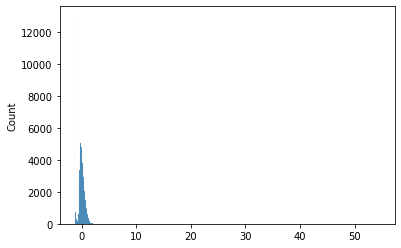

In [244]:
sns.histplot(cc)

In [59]:
df_gene_tp_all_info_mean2 = df_gene_tp_all_info.groupby(['classt','group', 'cell_type']).median().groupby(['classt','group']).median()



In [ ]:
df_list  = []
for number_of_times in range(25):
    
    number_of_genes_list = [10, 50, 100, 150, 200, 250, 500, 1000]
    marker_level_list = ['class', 'subclass', 'type']

    number_of_genes_list = [1000]
    marker_level_list = ['type']

    for number_of_genes in number_of_genes_list:
        for marker_level in marker_level_list:


            marker_list = pd.read_csv(f'/grid/gillis/data_norepl/lohia/hi_c_data_processing/notebooks/metamarkers/human/{marker_level}_markers_top1000.csv.gz', skiprows=1)

            marker_list['gene'] = marker_list['gene'].str.upper()
            df_ensg_name = pd.read_csv('/grid/gillis/data_norepl//lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['Ensembl_gene_identifier', 'Symbol']]
            marker_list = marker_list.merge(df_ensg_name.drop_duplicates(), right_on='Symbol', left_on='gene') 
            marker_list = marker_list[marker_list['Ensembl_gene_identifier'].isin(gene_list)]
            marker_list['%recurrence'] = marker_list['recurrence'] / marker_list['n_datasets']

            #marker_list = marker_list[marker_list['recurrence'] > 0]
            #marker_list['%recurrence'] = 1/marker_list['%recurrence']
            #marker_list = marker_list[marker_list['rank'] < 1000]
            #marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier'])
            marker_list = marker_list.sort_values(by=['rank', '%recurrence', 'auroc']).drop_duplicates(subset=['Ensembl_gene_identifier'])

            all_cell_types = marker_list.drop_duplicates(['cell_type'])['cell_type'].tolist()
            all_group_types = marker_list.drop_duplicates(['cell_type'])['group'].tolist()
            df2_list = []



            for group2 in all_cell_types:
                #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes))
                #df2_list.append(marker_list[marker_list['rank'] < number_of_genes])
                #df2_list.append(marker_list[marker_list['rank'].isin(list(all_marker_1))])
                m_tmp = marker_list[marker_list['cell_type']==group2]
                
                m_tmp = m_tmp[m_tmp['rank'] < 200]
                random_indices = np.random.choice(m_tmp.index, size=len(m_tmp), replace=True)

                # Sample from the original DataFrame using random indices
                bootstrap_sample = m_tmp.loc[random_indices]
                #df2_list.append(m_tmp[m_tmp['recurrence'] >=0])
                df2_list.append(bootstrap_sample)
                #marker_list['cell_type'] =   marker_list['cell_type'].sample(frac = 1).values
                #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).tail(number_of_genes))
                #print ((marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes)).shape[0])
            marker_list=pd.concat(df2_list)
            marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier'])
            #marker_list = marker_list[marker_list['rank'] <= number_of_genes] 

            #marker_list = marker_list[marker_list['auroc'] >= 0.85] 
            #marker_list = marker_list[marker_list.group.isin(['Sst'])]

            #marker_list = marker_list[marker_list.cell_type.isin(['Pvalb_1', 'Pvalb_2'])]
            #marker_list = marker_list.drop_duplicates(subset=['gene'], keep=False)

            #m_number_of_genes = number_of_genes +20
            #marker_list = marker_list[marker_list['rank'] < m_number_of_genes]
            #marker_list = marker_list.sort_values(by=['rank'])
            #print (marker_list)


            marker_table = marker_list.pivot_table(index='Ensembl_gene_identifier', columns='cell_type', values='rank', aggfunc='sum')

            marker_table.fillna(0, inplace=True)

            marker_table[marker_table != 0] = 1



    if marker_level == 'type':

        marker_list_t = pd.read_csv('/grid/gillis/data_norepl/lohia/hi_c_data_processing/notebooks/metamarkers/human/subclass_markers_top1000.csv.gz', skiprows=1)

        marker_list_t = marker_list_t.drop_duplicates(subset='cell_type')

        marker_list_t.rename(columns = {'group':'classt'}, inplace = True)
        marker_list_t.rename(columns = {'cell_type':'group'}, inplace = True)


        marker_list = marker_list[['Ensembl_gene_identifier', 'group', 'cell_type']].merge(marker_list_t[['classt', 'group']])

    if marker_level == 'subclass':
        marker_list.rename(columns = {'group':'classt'}, inplace = True)
        marker_list.rename(columns = {'cell_type':'group'}, inplace = True)
        marker_list['cell_type'] = marker_list['group'].tolist()


    marker_list = marker_list.sample(frac=1)

    marker_list = marker_list[['classt', 'group', 'cell_type', 'Ensembl_gene_identifier']]

    df_gene_tp = pd.DataFrame(my_data_zcore ,  index=gene_list, columns = bins_bed['bin_id'].tolist())

    df_gene_tp = df_gene_tp.loc[marker_list['Ensembl_gene_identifier'].tolist(), :]

    df_gene_tp_all_info = df_gene_tp.merge(marker_list, left_on=df_gene_tp.index, right_on=marker_list['Ensembl_gene_identifier'])

    df_gene_tp_all_info = df_gene_tp_all_info.set_index('key_0')

    df_gene_tp_all_info = df_gene_tp_all_info.drop(columns=['Ensembl_gene_identifier'])
    
    df_gene_tp_all_info['boot_id'] = number_of_times

    #df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group']).mean()
    
    #df_list.append(df_gene_tp_all_info_mean)
    
    df_list.append(df_gene_tp_all_info)

In [109]:
            marker_list = pd.read_csv(f'/grid/gillis/data_norepl/lohia/hi_c_data_processing/notebooks/metamarkers/human/{marker_level}_markers_top1000.csv.gz', skiprows=1)

            marker_list['gene'] = marker_list['gene'].str.upper()
            df_ensg_name = pd.read_csv('/grid/gillis/data_norepl//lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['Ensembl_gene_identifier', 'Symbol']]
            marker_list = marker_list.merge(df_ensg_name.drop_duplicates(), right_on='Symbol', left_on='gene') 
            marker_list = marker_list[marker_list['Ensembl_gene_identifier'].isin(gene_list)]
            marker_list['%recurrence'] = marker_list['recurrence'] / marker_list['n_datasets']

            #marker_list = marker_list[marker_list['recurrence'] > 0]
            #marker_list['%recurrence'] = 1/marker_list['%recurrence']
            #marker_list = marker_list[marker_list['rank'] < 1000]
            #marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier'])
            marker_list = marker_list.sort_values(by=['rank', '%recurrence', 'auroc']).drop_duplicates(subset=['Ensembl_gene_identifier'])


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (13,15,18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [113]:
marker_list[marker_list['rank'] < 250].groupby('group')['gene'].count()

group
Astro          331
Chandelier      69
Endo           178
L2/3 IT        373
L4 IT           77
L5 ET          170
L5 IT          243
L5/6 NP        292
L6 CT          169
L6 IT           46
L6 IT Car3     131
L6b            211
Lamp5          134
Lamp5_Lhx6     131
Micro-PVM      350
OPC            124
Oligo         1173
Pax6            81
Pvalb          375
Sncg           221
Sst            585
Sst Chodl       77
VLMC           132
Vip            462
Name: gene, dtype: int64

In [15]:
    input_path=f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
    bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
    bins_bed['bin_id'] = bins_bed.index
    #bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')
    
    bins_bed.to_csv(f'{input_path}/all_bins_true.bed', index=False, header=False, sep='\t')

In [16]:
pd.read_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Human/hg38-blacklist.v2.bed', sep='\t', names=['d', 'd1', 'd2', 'bin_id', 'c', 'c1', 'c2', 'c3', 'c4'])

os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -wo -b /grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Human/hg38-blacklist.v2.bed -a {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bins_true.bed > /grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Human/all_bin_blacklist_10kb.bed")
          
    

0

In [17]:
blacklist_bins = pd.read_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Human/all_bin_blacklist_1kb.bed', sep='\t', names=['d', 'd1', 'd2', 'bin_id', 'c', 'c1', 'c2', 'c3', 'c4'])


In [20]:
pure_bins = list(set(df_gene_tp_all_info_mean.columns.tolist()) - set(blacklist_bins['bin_id'].tolist()))


In [21]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



<ipython-input-164-e5c6d723eabc>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df_dist[[np.arange(df_dist.shape[0])]*2] = 0


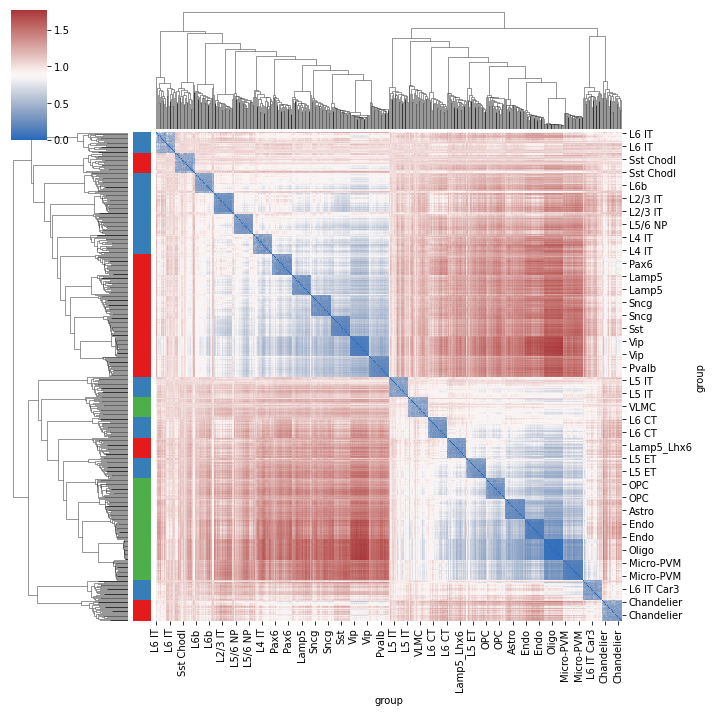

In [164]:
#dj = pd.concat(df_list)
dk = pd.concat(df_list)
#dk = df_gene_tp_all_info_mean
lut = dict(zip( dk.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('classt').map(lut)



features = dk.loc[:, pure_bins]
#features = dk.loc[:, bins_intersect]
#features = dk.loc[:, :]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)




<ipython-input-260-198fa8b2833c>:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df_dist[[np.arange(df_dist.shape[0])]*2] = 0


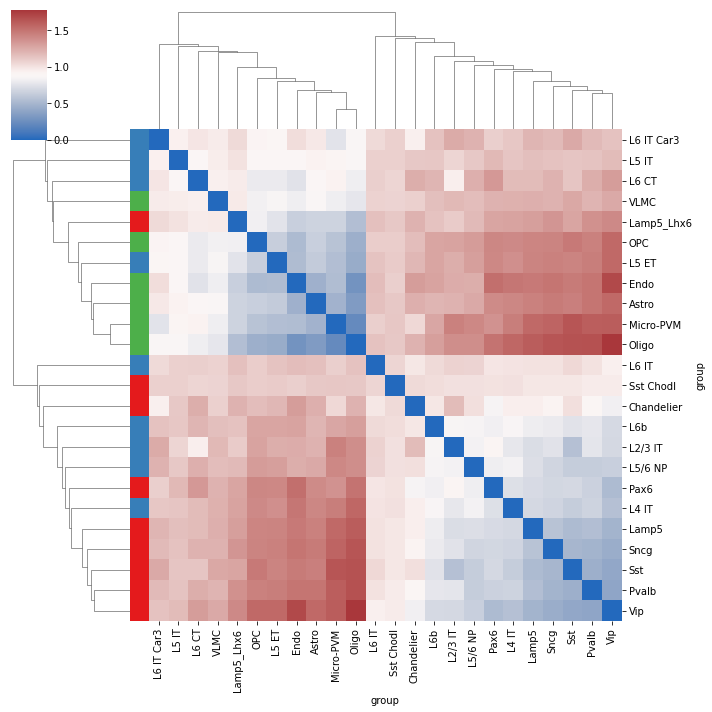

In [260]:
#dj = pd.concat(df_list)
dj = df_gene_tp_all_info_mean
dj = dj.reset_index()
#dj = dj[dj['classt']=='GABAergic']
dj['classt'] = ['Non-neuronal' if x =='Other' else x for x in dj['classt']]
dk = dj.groupby(['classt','group']).mean()
#dk = df_gene_tp_all_info_mean
lut = dict(zip( dk.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('classt').map(lut)



features = dk.loc[:, pure_bins]
#features = dk.loc[:, bins_intersect]
#features = dk.loc[:, :]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)




/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


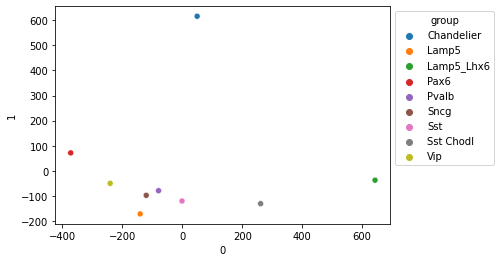

In [161]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(features_sc)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['group'] = features.index.get_level_values('group')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [139]:
dk.reset_index()[dk.reset_index()['classt'] == 'Glutamatergic']['group'].tolist()

['L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET',
 'L5 IT',
 'L5/6 NP',
 'L6 CT',
 'L6 IT',
 'L6 IT Car3',
 'L6b',
 'L2/3 IT',
 'L4 IT',
 'L5 ET'

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


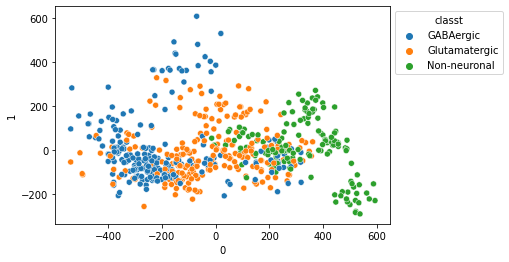

In [165]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

#dj = pd.concat(df_list)
dk = pd.concat(df_list)
#dk = df_gene_tp_all_info_mean
lut = dict(zip( dk.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('classt').map(lut)



features = dk.loc[:, pure_bins]
#features = dk.loc[:, bins_intersect]
#features = dk.loc[:, :]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(features_sc)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


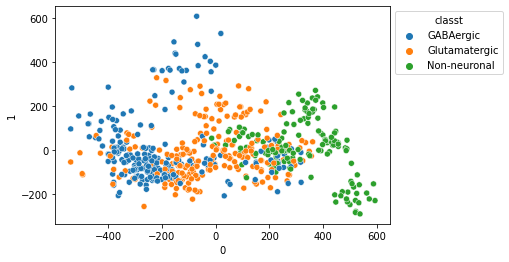

In [263]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

#dj = pd.concat(df_list)
dk = pd.concat(df_list)
#dk = df_gene_tp_all_info_mean
lut = dict(zip( dk.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('classt').map(lut)



features = dk.loc[:, pure_bins]
#features = dk.loc[:, bins_intersect]
#features = dk.loc[:, :]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(features_sc)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


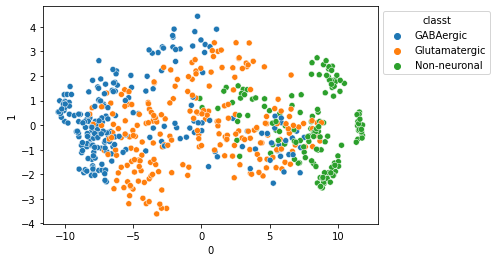

In [167]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(1-R1)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


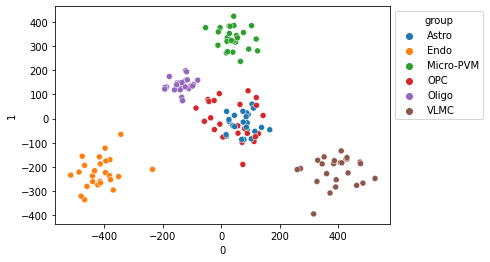

In [270]:

dk = pd.concat(df_list)
#dk = df_gene_tp_all_info_mean
lut = dict(zip( dk.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('classt').map(lut)



features = dk.loc[:, pure_bins]
#features = dk.loc[:, bins_intersect]
#features = dk.loc[:, :]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]

features = features[features.index.get_level_values('classt') == 'Non-neuronal']
features_sc =  StandardScaler().fit_transform(features)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(features_sc)

df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
df_proj_2d['group'] = features.index.get_level_values('group')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] == 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [269]:
dk

0         1         2         3         4       \
classt       group                                                          
GABAergic    Chandelier -1.434351 -0.574166 -1.289942 -1.031649 -1.066979   
             Lamp5      -1.415600 -0.890418 -1.236613 -1.137077 -1.054456   
             Lamp5_Lhx6 -1.261802 -0.607148 -1.067453 -0.941119 -0.910698   
             Pax6       -1.415037 -0.700500 -1.242939 -0.976862 -1.073520   
             Pvalb      -1.377298 -0.849204 -1.214482 -1.031336 -1.038555   
...                           ...       ...       ...       ...       ...   
Non-neuronal Endo       -1.198918 -0.321787 -1.026134 -0.726074 -0.856793   
             Micro-PVM  -1.319406 -0.720555 -1.180765 -1.008778 -0.988025   
             OPC        -1.273148 -0.661578 -1.089704 -0.971398 -0.945618   
             Oligo      -1.253828 -0.531657 -1.093847 -0.939672 -0.904596   
             VLMC       -1.299736 -0.825279 -1.200450 -1.014105 -1.018637   

                           5         6         7         8         9       \
classt       group                                                          
GABAergic    Chandelier -0.317895 -0.390585 -0.764957 -0.379733 -0.859309   
             Lamp5      -0.468762 -0.612721 -0.750203 -0.429749 -0.825286   
             Lamp5_Lhx6 -0.064115 -0.275690 -0.450061 -0.015791 -0.493327   
             Pax6       -0.230398 -0.506596 -0.686030 -0.262452 -0.785207   
             Pvalb      -0.440621 -0.474795 -0.686372 -0.388775 -0.775782   
...                           ...       ...       ...       ...       ...   
Non-neuronal Endo        0.173790  0.134180 -0.127411  0.529311 -0.175412   
             Micro-PVM  -0.302192 -0.269983 -0.552222 -0.203100 -0.683087   
             OPC        -0.241145 -0.386089 -0.583959 -0.336163 -0.604798   
             Oligo      -0.095958 -0.214541 -0.490036 -0.019134 -0.542602   
             VLMC       -0.402915 -0.502417 -0.661331 -0.294095 -0.707911   

                         ...    287499    287500    287501    287502  \
classt       group       ...                                           
GABAergic    Chandelier  ... -1.091821 -1.297956 -0.890958 -1.412922   
             Lamp5       ... -1.069776 -1.258868 -1.191702 -1.407214   
             Lamp5_Lhx6  ... -0.931557 -1.169865 -1.126529 -1.264626   
             Pax6        ... -1.055529 -1.298632 -1.170932 -1.408251   
             Pvalb       ... -1.039834 -1.223430 -1.134730 -1.370854   
...                      ...       ...       ...       ...       ...   
Non-neuronal Endo        ... -0.867918 -1.061973 -0.958688 -1.171947   
             Micro-PVM   ... -0.948453 -1.172259 -1.073503 -1.301921   
             OPC         ... -0.977150 -1.191274 -1.092841 -1.276964   
             Oligo       ... -0.909382 -1.110905 -1.022847 -1.236756   
             VLMC        ... -0.955210 -1.147165 -1.074306 -1.284702   

                           287503    287504    287505    287506    287507  \
classt       group                                                          
GABAergic    Chandelier -0.820811 -0.043169 -0.416802 -0.419258 -1.026658   
             Lamp5      -0.741027  0.034639 -0.160859 -0.403535 -1.003666   
             Lamp5_Lhx6 -0.616782  0.416139 -0.082892 -0.205509 -0.939204   
             Pax6       -0.641272  0.262456 -0.357975 -0.229519 -0.988465   
             Pvalb      -0.640240  0.102707 -0.290087 -0.285476 -0.982215   
...                           ...       ...       ...       ...       ...   
Non-neuronal Endo       -0.447101  0.578577  0.007078 -0.029588 -0.817280   
             Micro-PVM  -0.520166  0.497789 -0.020301 -0.142541 -0.924708   
             OPC        -0.528906  0.385953 -0.063767 -0.074158 -0.905098   
             Oligo      -0.495875  0.453568  0.010275 -0.091367 -0.808091   
             VLMC       -0.595596  0.260784 -0.038250 -0.150822 -0.883872   

                           287508  
classt       group                 
GABAergic   

In [266]:
features[features.index.get_level_values('classt') == 'GABAergic']

793       794       795       796       797     \
classt    group                                                          
GABAergic Chandelier  0.495444  0.516357  0.096440  0.087150  0.599601   
          Lamp5       0.363749  0.720976  0.109401 -0.194423  0.603928   
          Lamp5_Lhx6  0.905038  0.895206  0.472935 -0.024145  0.717577   
          Pax6        0.474847  0.710719  0.051476 -0.146006  0.506244   
          Pvalb       0.652398  0.621498  0.229712 -0.097444  0.608472   
...                        ...       ...       ...       ...       ...   
          Pvalb       0.621424  0.585043  0.166111 -0.081271  0.584235   
          Sncg        0.643587  0.703861  0.475658 -0.143440  0.631221   
          Sst         0.649573  0.745306  0.204640 -0.080510  0.712164   
          Sst Chodl   0.626151  0.699083  0.332628 -0.191984  0.574507   
          Vip         0.556466  0.734434  0.156233 -0.117752  0.576490   

                        798       799       800       801       802     ...  \
classt    group                                                         ...   
GABAergic Chandelier  0.241758  0.371782  1.151441  0.828590 -0.005677  ...   
          Lamp5       0.337334  0.276577  0.459124  0.862201  0.020742  ...   
          Lamp5_Lhx6  0.238986  0.479155  0.617170  0.837423  0.138885  ...   
          Pax6        0.177315  0.505915  0.521363  0.802565  0.018119  ...   
          Pvalb       0.223410  0.457833  0.428914  0.741030  0.050721  ...   
...                        ...       ...       ...       ...       ...  ...   
          Pvalb       0.207197  0.385398  0.362090  0.726300  0.037745  ...   
          Sncg        0.073241  0.493582  0.381759  0.771365  0.035667  ...   
          Sst         0.217262  0.370425  0.472406  0.700625  0.014832  ...   
          Sst Chodl   0.130174  0.405748  0.267730  0.944561 -0.008601  ...   
          Vip         0.142612  0.339782  0.417044  0.665093  0.120681  ...   

                        287499    287500    287501    287502    287503  \
classt    group                                                          
GABAergic Chandelier -1.091821 -1.297956 -0.890958 -1.412922 -0.820811   
          Lamp5      -1.069776 -1.258868 -1.191702 -1.407214 -0.741027   
          Lamp5_Lhx6 -0.931557 -1.169865 -1.126529 -1.264626 -0.616782   
          Pax6       -1.055529 -1.298632 -1.170932 -1.408251 -0.641272   
          Pvalb      -1.039834 -1.223430 -1.134730 -1.370854 -0.640240   
...                        ...       ...       ...       ...       ...   
          Pvalb      -1.011007 -1.237861 -1.094517 -1.360389 -0.624705   
          Sncg       -1.062469 -1.217789 -1.176409 -1.389299 -0.704605   
          Sst        -1.020989 -1.207625 -1.130582 -1.288125 -0.607480   
          Sst Chodl  -1.008048 -1.254874 -1.133755 -1.353685 -0.684028   
          Vip        -1.095609 -1.279680 -1.207807 -1.399115 -0.717139   

                        287504    287505    287506    287507    287508  
classt    group                                                         
GABAergic Chandelier -0.043169 -0.416802 -0.419258 -1.026658 -1.452875  
          Lamp5       0.034639 -0.160859 -0.403535 -1.003666 -1.418105  
          Lamp5_Lhx6  0.416139 -0.082892 -0.205509 -0.939204 -1.279613  
          Pax6        0.262456 -0.357975 -0.229519 -0.988465 -1.425800  
          Pvalb       0.102707 -0.290087 -0.285476 -0.982215 -1.397838  
...                        ...       ...       ...       ...       ...  
          Pvalb       0.178503 -0.201879 -0.254793 -0.705820 -1.382301  
          Sncg       -0.017557 -0.347093 -0.376936 -1.009115 -1.407921  
          Sst         0.245971 -0.218770 -0.176244 -0.863929 -1.346663  
          Sst Chodl   0.395576 -0.014763 -0.253259 -0.944415 -1.353685  
          Vip        -0.031567 -0.378851 -0.429875 -0.999598 -1.412491  

[225 rows x 264607 columns]

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


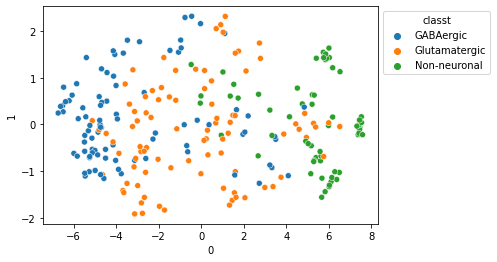

In [132]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(1-R1)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


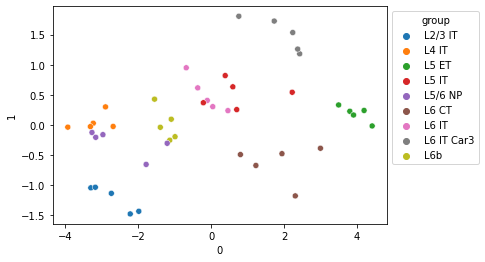

In [108]:
df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
df_proj_2d['group'] = features.index.get_level_values('group')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] == 'GABAergic']
df_proj_2d = df_proj_2d[df_proj_2d['classt'] == 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


<ipython-input-22-37f3b307d73b>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df_dist[[np.arange(df_dist.shape[0])]*2] = 0


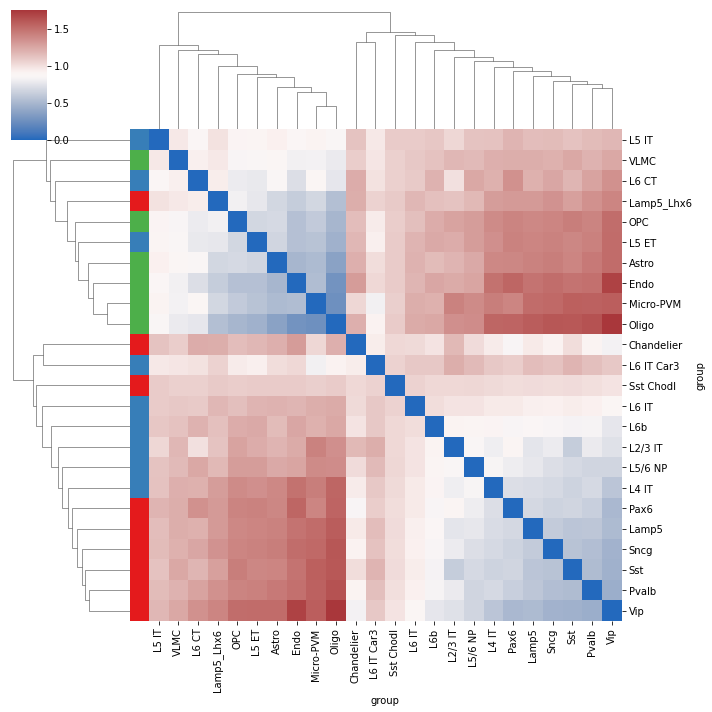

In [22]:
#dj = pd.concat(df_list)
#dk = pd.concat(df_list)
dk = df_gene_tp_all_info_mean
lut = dict(zip( dk.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('classt').map(lut)



features = dk.loc[:, pure_bins]
#features = dk.loc[:, bins_intersect]
#features = dk.loc[:, :]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)




/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


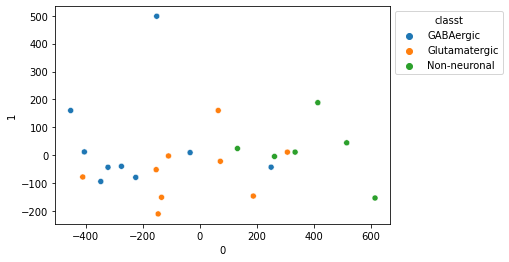

In [86]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(features_sc)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


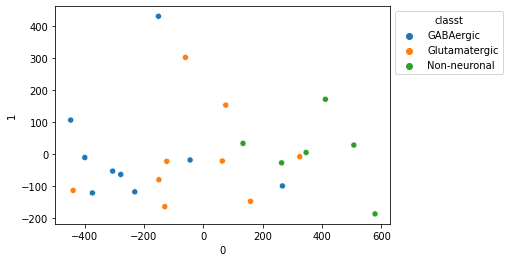

In [74]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(features_sc)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [24]:
full_input_path = f'/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/'
full_target_path = f'/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_mouse/aggregates/10kbp_raw/max/'

os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -wo -b {full_input_path}/all_bins_true_minmatch0.1_mouse.bed -a {full_target_path}/all_bins_true.bed > {full_target_path}/all_bins_true_minmatch0.1_mouse_intersect.bed")
          

df_human_mouse_bins = pd.read_csv(f'{full_target_path}/all_bins_true_minmatch0.1_mouse_intersect.bed', sep='\t', names=['a', 'b', 'c', 'mouse_bin', 'a1', 'b1', 'c1', 'human_bin', 'overlap'])



df_human_mouse_bins['length'] = df_human_mouse_bins['c1'] - df_human_mouse_bins['b1']



df_human_mouse_bins = df_human_mouse_bins.sort_values(['overlap'], ascending=False).drop_duplicates(subset=['human_bin']).drop_duplicates(subset=['mouse_bin'])



df_human_mouse_bins.to_csv('./human_mouse_bin.csv')



In [179]:
df_human_mouse_bins = pd.read_csv('./human_mouse_bin.csv')


human_bins = list(set(df_human_mouse_bins['human_bin']).intersection(pure_bins))

dj = pd.concat(df_list)

#dj = dj.reset_index()
#dj = dj[dj['classt']!='Otheer']
#dj['classt'] = ['Non-neuronal' if x =='Other' else x for x in dj['classt']]
#dk = dj.groupby(['classt','group']).mean()


dj.loc[:,human_bins].to_csv('./human_features.csv')

In [ ]:
dk  = pd.concat(df_list)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


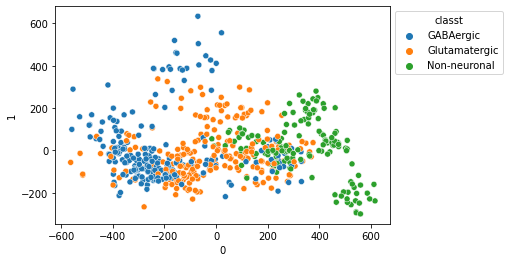

In [172]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler

features = dk.loc[:, :]
#features = dk.loc[:, bins_intersect]
#features = dk.loc[:, :]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)

#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(features_sc)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


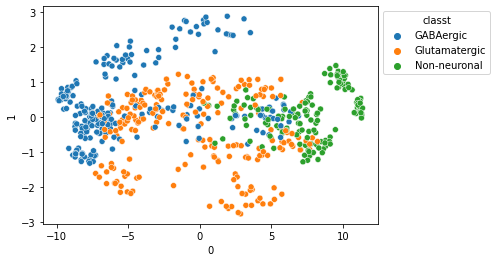

In [177]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler

df_human_mouse_bins = pd.read_csv('./human_mouse_bin.csv')


human_bins = list(set(df_human_mouse_bins['human_bin']).intersection(pure_bins))

features = dk.loc[:, human_bins]
#features = dk.loc[:, bins_intersect]
#features = dk.loc[:, :]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(R1)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


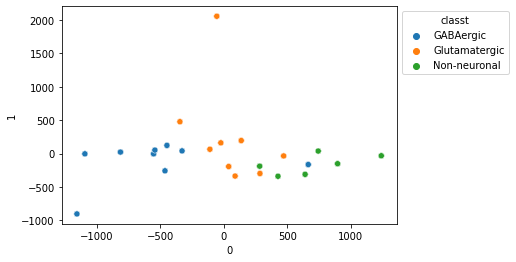

In [66]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler



#umap_2d = UMAP(n_components=2, init='random', random_state=1)


#proj_2d = umap_2d.fit_transform(1-R1)

from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
proj_2d = pca.fit_transform(features_sc)


df_proj_2d= pd.DataFrame(proj_2d)


df_proj_2d['classt'] = features.index.get_level_values('classt')
#df_proj_2d = df_proj_2d[df_proj_2d['classt'] = 'Glutamatergic']
#df_proj_2d['classt'] = [class_dict[x] if x in class_dict.keys() else 'miss' for x in df_proj_2d['group']]
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


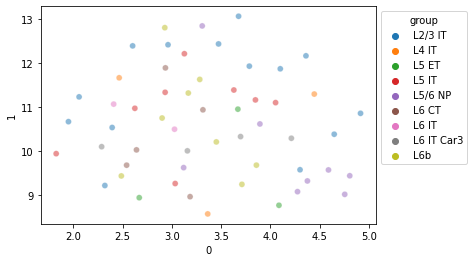

In [52]:
df_proj_2d['classt'] = features.index.get_level_values('classt')
df_proj_2d['group'] = features.index.get_level_values('group')
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'],alpha=0.5
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))



<ipython-input-75-073a3cbb06d1>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df_dist[[np.arange(df_dist.shape[0])]*2] = 0


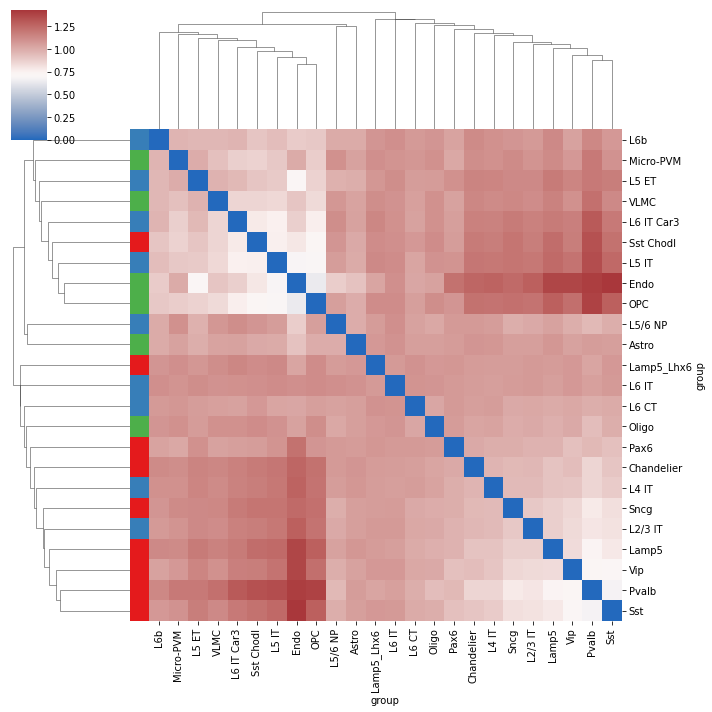

In [75]:
dj = df_gene_tp_all_info_mean
dj = dj.reset_index()
dj = dj[dj['classt']!='Otheer']
dk = dj.groupby(['classt','group']).mean()
lut = dict(zip( dk.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('classt').map(lut)



features = dk.loc[:, pure_bins]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)



In [45]:
dj = df_gene_tp_all_info_mean
dj = dj.reset_index()
dj = dj[dj['classt']!='Otheer']
dk = dj.groupby(['classt','group', 'cell_type']).mean()
lut = dict(zip( dk.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('classt').map(lut)



features = dk.loc[:, pure_bins]
features = features.dropna(axis=0)
#features = features.loc[:, dk_max[dk_max>5].index.tolist()]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)



KeyError: 'cell_type'

In [46]:
df_gene_tp_all_info_mean


0         1         2         3         4        \
classt        group                                                          
GABAergic     Chandelier -0.996336 -0.996336 -0.996336 -0.996336 -0.996336   
              Lamp5      -0.947891 -0.947891 -0.947891 -0.947891 -0.947891   
              Lamp5_Lhx6 -0.817473 -0.817473 -0.817473 -0.817473 -0.817473   
              Pax6       -0.959083 -0.959083 -0.959083 -0.959083 -0.959083   
              Pvalb      -0.945001 -0.945001 -0.945001 -0.945001 -0.945001   
              Sncg       -0.915993 -0.915993 -0.915993 -0.915993 -0.915993   
              Sst        -0.905499 -0.905499 -0.905499 -0.905499 -0.905499   
              Sst Chodl  -0.937941 -0.937941 -0.937941 -0.937941 -0.937941   
              Vip        -0.898982 -0.898982 -0.898982 -0.898982 -0.898982   
Glutamatergic L2/3 IT    -0.804836 -0.804836 -0.804836 -0.804836 -0.804836   
              L4 IT      -0.846813 -0.846813 -0.846813 -0.846813 -0.846813   
              L5 ET      -0.890504 -0.890504 -0.890504 -0.890504 -0.890504   
              L5 IT      -0.825292 -0.825292 -0.825292 -0.825292 -0.825292   
              L5/6 NP    -0.844321 -0.844321 -0.844321 -0.844321 -0.844321   
              L6 CT      -0.911240 -0.911240 -0.911240 -0.911240 -0.911240   
              L6 IT      -0.886529 -0.886529 -0.886529 -0.886529 -0.886529   
              L6 IT Car3 -0.907857 -0.907857 -0.907857 -0.907857 -0.907857   
              L6b        -0.871194 -0.871194 -0.871194 -0.871194 -0.871194   
Non-neuronal  Astro      -0.767853 -0.767853 -0.767853 -0.767853 -0.767853   
              Endo       -0.771186 -0.771186 -0.771186 -0.771186 -0.771186   
              Micro-PVM  -0.859538 -0.859538 -0.859538 -0.859538 -0.859538   
              OPC        -0.872718 -0.872718 -0.872718 -0.872718 -0.872718   
              Oligo      -0.793734 -0.793734 -0.793734 -0.793734 -0.793734   
              VLMC       -0.870801 -0.870801 -0.870801 -0.870801 -0.870801   

                           5         6         7         8         9        \
classt        group                                                          
GABAergic     Chandelier -0.996336 -0.996336 -0.996336 -0.996336 -0.996336   
              Lamp5      -0.947891 -0.947891 -0.947891 -0.947891 -0.947891   
              Lamp5_Lhx6 -0.817473 -0.817473 -0.817473 -0.817473 -0.817473   
              Pax6       -0.959083 -0.959083 -0.959083 -0.959083 -0.959083   
              Pvalb      -0.945001 -0.945001 -0.945001 -0.945001 -0.945001   
              Sncg       -0.915993 -0.915993 -0.915993 -0.915993 -0.915993   
              Sst        -0.905499 -0.905499 -0.905499 -0.905499 -0.905499   
              Sst Chodl  -0.937941 -0.937941 -0.937941 -0.937941 -0.937941   
              Vip        -0.898982 -0.898982 -0.898982 -0.898982 -0.898982   
Glutamatergic L2/3 IT    -0.804836 -0.804836 -0.804836 -0.804836 -0.804836   
              L4 IT      -0.846813 -0.846813 -0.846813 -0.846813 -0.846813   
              L5 ET      -0.890504 -0.890504 -0.890504 -0.890504 -0.890504   
              L5 IT      -0.825292 -0.825292 -0.825292 -0.825292 -0.825292   
              L5/6 NP    -0.844321 -0.844321 -0.844321 -0.844321 -0.844321   
              L6 CT      -0.911240 -0.911240 -0.911240 -0.911240 -0.911240   
              L6 IT      -0.886529 -0.886529 -0.886529 -0.886529 -0.886529   
              L6 IT Car3 -0.907857 -0.907857 -0.907857 -0.907857 -0.907857   
              L6b        -0.871194 -0.871194 -0.871194 -0.871194 -0.871194   
Non-neuronal  Astro      -0.767853 -0.767853 -0.767853 -0.767853 -0.767853   
              Endo       -0.771186 -0.771186 -0.771186 -0.771186 -0.771186   
              Micro-PVM  -0.859538 -0.859538 -0.859538 -0.859538 -0.859538   
              OPC        -0.872718 -0.872718 -0.872718 -0.872718 -0.872718   
              Oligo      -0.793734 -0.793734 -0.793734 -0.793734 -0.793734   
              VLMC       -0.870801 -0.870801 -0.

In [ ]:
df_human_mouse_bins = pd.read_csv('./human_mouse_bin.csv')


human_bins = list(set(df_human_mouse_bins['human_bin']).intersection(pure_bins))


df_gene_tp_all_info_mean.loc[:,human_bins].to_csv('./human_features.csv')


In [31]:
features


793       794       795       796       797      \
classt        group                                                          
GABAergic     Chandelier  0.362401  0.016082 -0.320243 -0.126469 -0.088139   
              Lamp5       0.111175 -0.013445 -0.406398 -0.266252 -0.202310   
              Lamp5_Lhx6  0.611868  0.176489 -0.198284 -0.034195  0.173038   
              Pax6        0.220783 -0.214173 -0.290417 -0.047872  0.016612   
              Pvalb       0.299392 -0.058238 -0.267023 -0.074392 -0.094251   
              Sncg        0.355400  0.005856 -0.356420 -0.255332 -0.222907   
              Sst         0.347751 -0.031220 -0.233320 -0.137813 -0.045516   
              Sst Chodl   0.341086 -0.052587 -0.216088 -0.163342  0.084582   
              Vip         0.212139 -0.004039 -0.321202 -0.150499 -0.168677   
Glutamatergic L2/3 IT     0.278380  0.009539 -0.309453 -0.164460 -0.099746   
              L4 IT       0.183361  0.202971 -0.392126 -0.195939 -0.138113   
              L5 ET       0.547875  0.149982 -0.226108 -0.025703 -0.022000   
              L5 IT       0.361109  0.005157 -0.207005 -0.046186  0.010810   
              L5/6 NP     0.306133 -0.105821 -0.370068 -0.238194 -0.099754   
              L6 CT       0.269772 -0.049005 -0.114383  0.033434 -0.119939   
              L6 IT       0.310557 -0.096835 -0.127009  0.059621 -0.088234   
              L6 IT Car3  0.435551  0.070977 -0.253665  0.085009 -0.066565   
              L6b         0.313878 -0.057004 -0.327877 -0.149928  0.101843   
Non-neuronal  Astro       0.261668  0.006744 -0.150857  0.009855 -0.059267   
              Endo        0.457007 -0.004726 -0.197206  0.036210  0.082802   
              Micro-PVM   0.434545  0.034826 -0.150135 -0.092485  0.049517   
              OPC         0.350390 -0.090665 -0.255635 -0.136469 -0.066742   
              Oligo       0.460597  0.087403 -0.130170  0.003769 -0.013303   
              VLMC        0.463517  0.106588 -0.174842 -0.067333 -0.088589   

                           798       799       800       801       802      \
classt        group                                                          
GABAergic     Chandelier -0.070393 -0.053113 -0.071179 -0.049447 -0.185407   
              Lamp5      -0.134314 -0.170137 -0.080537 -0.107453 -0.131731   
              Lamp5_Lhx6 -0.063256 -0.113046  0.147113  0.082178 -0.135963   
              Pax6       -0.359106 -0.049655 -0.067954 -0.036343 -0.308248   
              Pvalb      -0.248177 -0.107967 -0.084158 -0.006163 -0.002930   
              Sncg       -0.310307 -0.017956 -0.153633 -0.010544 -0.083294   
              Sst        -0.266009 -0.096282 -0.029109  0.039718 -0.048134   
              Sst Chodl  -0.194900 -0.102317 -0.162408  0.282397 -0.166042   
              Vip        -0.265533 -0.119943 -0.073750 -0.025149 -0.129726   
Glutamatergic L2/3 IT    -0.255591  0.087036 -0.089406  0.013689  0.008852   
              L4 IT      -0.113369 -0.096133  0.253589  0.037086  0.082202   
              L5 ET      -0.225913  0.003766 -0.054706  0.080769 -0.009198   
              L5 IT      -0.169258 -0.007961 -0.074713  0.086235  0.007145   
              L5/6 NP    -0.344896 -0.082412 -0.086745  0.037717 -0.075194   
              L6 CT      -0.146344  0.008106  0.088700 -0.014442  0.033526   
              L6 IT      -0.098640 -0.108887 -0.040922  0.066906  0.253085   
              L6 IT Car3 -0.134312  0.025035 -0.043131  0.086440  0.091252   
              L6b        -0.258289  0.015598 -0.073740  0.023218 -0.089003   
Non-neuronal  Astro      -0.103738 -0.003468 -0.012410  0.203981 -0.034548   
              Endo       -0.083597  0.024576  0.160383  0.105481  0.105294   
              Micro-PVM  -0.166065  0.217836  0.162784  0.227873  0.001728   
              OPC        -0.153865  0.023756  0.194230  0.347373 -0.132494   
              Oligo      -0.184736  0.050823  0.079491  0.175213  0.033324   
              VLMC       -0.172458 -0.119424  0.

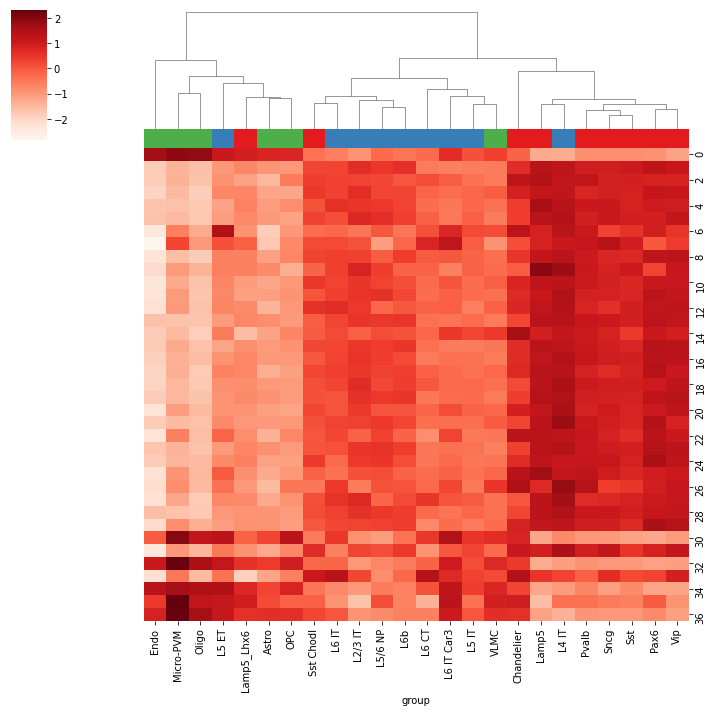

In [69]:

df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_human/{SRP_name}/{resolution}/cre_modules.bed', sep='\t', names=['c','d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id'])


df_hba_modules = df_hba_modules.drop_duplicates(['bin_id'], keep=False)
all_bins = []
mean_list = []
all_bins = []
for i in list(range(1,38)):
    m="M"+str(i)
    given_bins = df_hba_modules[df_hba_modules['ccre']==m]['bin_id'].tolist()
    all_bins.extend(given_bins)
    all_bins.extend(given_bins)
    mean_list.append(dk.loc[: , given_bins].mean(axis=1).values.tolist())
features_sc =  StandardScaler().fit_transform((np.vstack(mean_list)).T)
mean_list_df = pd.DataFrame(features_sc.T , columns = dk.index.get_level_values('group'))

sns.clustermap(mean_list_df, col_cluster=True, row_cluster=False, robust=False, z_score=0, col_colors=[row_colors], cmap='Reds')


In [53]:
dl = df_gene_tp_all_info_mean
dl = dl.reset_index()
dj = dl[dl['classt']!='Glutamatergicm']
dk = dj.groupby(['classt','group']).mean()
features = dk.loc[:, pure_bins]
features = features.dropna(axis=1)
#features = dk.loc[:, :]
features_sc =  StandardScaler().fit_transform(features)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


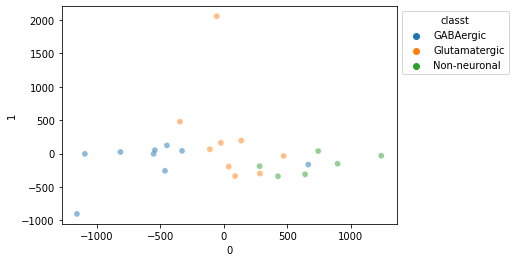

In [54]:
#umap_2d = UMAP(n_components=2, init='random', random_state=10)


#proj_2d = umap_2d.fit_transform(features_sc)

#df_proj_2d= pd.DataFrame(proj_2d)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj_2d = pca.fit_transform(features_sc)
df_proj_2d= pd.DataFrame(proj_2d)

df_proj_2d['classt'] = features.index.get_level_values('classt')
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],alpha=0.5
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


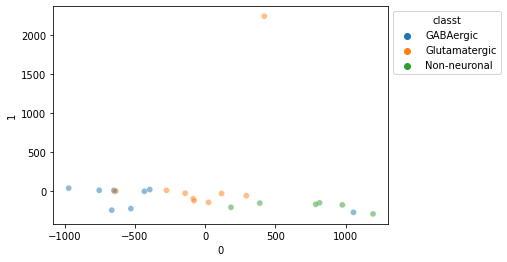

In [217]:
df_proj_2d['classt'] = features.index.get_level_values('classt')
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],alpha=0.5
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


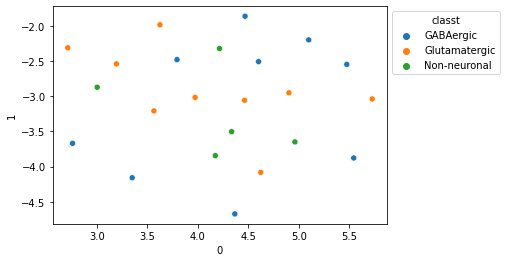

In [302]:
df_proj_2d['classt'] = features.index.get_level_values('classt')
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


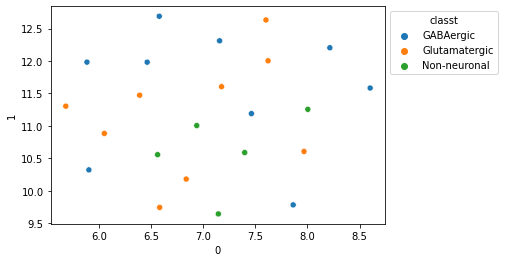

In [299]:
df_proj_2d['classt'] = features.index.get_level_values('classt')
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [122]:
#df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group', 'cell_type']).mean().reset_index().groupby(['classt','group']).mean()
df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group']).mean()

In [123]:
all_bins_mean = df_gene_tp_all_info_mean.mean(axis=0)

all_bins_std = df_gene_tp_all_info_mean.std(axis=0)

In [199]:
all_marker_1 = list(np.arange(1,300, 3, dtype='int'))

all_marker_2 = list(np.arange(2,300, 3, dtype='int'))

all_marker_3 = list(np.arange(3,300, 3, dtype='int'))

In [215]:
m_list = list(range(200))
all_marker_1_more = [[random.choice(m_list) for i in list(range(0,100))] for i in range(0,5)]

In [ ]:
import random
marker_mean_list = []
#for marker_iter in [all_marker_1, all_marker_2]:
#for marker_iter in all_marker_1_more:
for marker_iter_st in list(range(0,1)):
    number_of_genes_list = [10, 50, 100, 150, 200, 250, 500, 1000]
    marker_level_list = ['class', 'subclass', 'type']

    number_of_genes_list = [10]
    marker_level_list = ['type']

    for number_of_genes in number_of_genes_list:
        for marker_level in marker_level_list:
            
            


            marker_list = pd.read_csv(f'{base_folder}/hi_c_data_processing/notebooks/metamarkers/human/{marker_level}_markers_top1000.csv.gz', skiprows=1)

            marker_list['gene'] = marker_list['gene'].str.upper()
            df_ensg_name = pd.read_csv(f'{base_folder}/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['Ensembl_gene_identifier', 'Symbol']]
            marker_list = marker_list.merge(df_ensg_name.drop_duplicates(), right_on='Symbol', left_on='gene') 
            marker_list = marker_list[marker_list['Ensembl_gene_identifier'].isin(gene_list)]
            #marker_list = marker_list.sort_values(by='rank')
            #marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier'])
            marker_list = marker_list[marker_list['rank'] < 200]

            
            if marker_level == 'type':

                marker_list_t = pd.read_csv(f'{base_folder}/hi_c_data_processing/notebooks/metamarkers/human/subclass_markers_top1000.csv.gz', skiprows=1)

                marker_list_t = marker_list_t.drop_duplicates(subset='cell_type')

                marker_list_t.rename(columns = {'group':'classt'}, inplace = True)
                marker_list_t.rename(columns = {'cell_type':'group'}, inplace = True)


                marker_list = marker_list[['Ensembl_gene_identifier', 'group', 'cell_type', 'rank']].merge(marker_list_t[['classt', 'group']])
            
            #marker_list = marker_list.drop_duplicates(subset=['classt','Ensembl_gene_identifier'])
            marker_list = marker_list.drop_duplicates(subset=['group','Ensembl_gene_identifier'])
            #marker_list = marker_list[marker_list['classt']=='GABAergic']
            marker_list = marker_list[marker_list['classt']=='Glutamatergic']

            all_cell_types = marker_list.drop_duplicates(['cell_type'])['cell_type'].tolist()
            all_group_types = marker_list.drop_duplicates(['group'])['group'].tolist()
            df2_list = []
            print (marker_list.groupby('cell_type')['group'].count().head(50))
            
            print (marker_list)



            for group2 in all_cell_types:
                #df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(200).head(number_of_genes))
                #df2_list.append(marker_list[marker_list['rank'] < number_of_genes])
                m_tmp = marker_list[marker_list['cell_type']==group2]
                m_tmp['adj_rank'] = [i for i in list(range(0,m_tmp.shape[0]))]
                #print (m_tmp[m_tmp['rank'] < 50].shape)


                #m_tmp = m_tmp[m_tmp['rank'] < 100]
                #print ((m_tmp[m_tmp['adj_rank'].isin(list(marker_iter))]).shape[0])
                
                
                print (group2, m_tmp['adj_rank'].max())
                if m_tmp['adj_rank'].max() > 1:
                    all_marker_1 = list(np.arange(0,m_tmp['adj_rank'].max(), 1, dtype='int'))
                    #marker_iter = [random.choice(all_marker_1) for i in list(range(0,m_tmp['adj_rank'].max()))]
                    marker_iter = [random.choice(all_marker_1) for i in list(range(0,10))]
                    #marker_iter_tmp = [x for x in list(marker_iter) if x<= m_tmp['adj_rank'].max() ]
                

                    df2_list.append(m_tmp[m_tmp['adj_rank'].isin(list(all_marker_1))])
                    
                    #df2_list.append(m_tmp.iloc[marker_iter])
                    #df2_list.append(m_tmp.iloc[marker_iter])


            marker_list=pd.concat(df2_list)
            #marker_list['adj_rank'] = [i for i in list(range(0,marker_list.shape[0]))]
            #marker_list=marker_list[marker_list['adj_rank'].isin(list(marker_iter))]
            #marker_list = marker_list.sort_values(by='rank').drop_duplicates(subset=['Ensembl_gene_identifier', 'group'])
            #marker_list = marker_list[marker_list['rank'] <= number_of_genes] 

            #marker_list = marker_list[marker_list['auroc'] >= 0.85] 
            #marker_list = marker_list[marker_list.group.isin(['Sst'])]

            #marker_list = marker_list[marker_list.cell_type.isin(['Pvalb_1', 'Pvalb_2'])]
            #marker_list = marker_list.drop_duplicates(subset=['gene'], keep=False)

            #m_number_of_genes = number_of_genes +20
            #marker_list = marker_list[marker_list['rank'] < m_number_of_genes]
            #marker_list = marker_list.sort_values(by=['rank'])
            #print (marker_list)


            marker_table = marker_list.pivot_table(index='Ensembl_gene_identifier', columns='cell_type', values='rank', aggfunc='sum')

            marker_table.fillna(0, inplace=True)

            marker_table[marker_table != 0] = 1



    if marker_level == 'subclass':
        marker_list.rename(columns = {'group':'classt'}, inplace = True)
        marker_list.rename(columns = {'cell_type':'group'}, inplace = True)
        marker_list['cell_type'] = marker_list['group'].tolist()


    marker_list = marker_list.sample(frac=1)

    marker_list = marker_list[['classt', 'group', 'cell_type', 'Ensembl_gene_identifier']]

    df_gene_tp = pd.DataFrame(my_data_zcore ,  index=gene_list, columns = bins_bed['bin_id'].tolist())

    df_gene_tp = df_gene_tp.loc[marker_list['Ensembl_gene_identifier'].tolist(), :]

    df_gene_tp_all_info = df_gene_tp.merge(marker_list, left_on=df_gene_tp.index, right_on=marker_list['Ensembl_gene_identifier'])

    df_gene_tp_all_info = df_gene_tp_all_info.set_index('key_0')

    df_gene_tp_all_info = df_gene_tp_all_info.drop(columns=['Ensembl_gene_identifier'])



    #df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group', 'cell_type']).mean().reset_index().groupby(['classt','group']).mean()
    df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group', 'cell_type']).mean()
    #df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group']).mean()
    marker_mean_list.append(df_gene_tp_all_info_mean)


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (13,15,18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


cell_type
L2/3 IT_1       160
L2/3 IT_10      138
L2/3 IT_11       99
L2/3 IT_12       70
L2/3 IT_13      105
L2/3 IT_14      112
L2/3 IT_2        99
L2/3 IT_3        87
L2/3 IT_4        28
L2/3 IT_5        33
L2/3 IT_6        81
L2/3 IT_7        64
L2/3 IT_8        43
L2/3 IT_9        95
L4 IT_1         145
L4 IT_2         134
L4 IT_3         132
L5 ET_1         165
L5 ET_2         169
L5 ET_3         166
L5 IT_1         156
L5 IT_2         151
L5 IT_3         157
L5 IT_4          71
L5 IT_5         124
L5 IT_6          85
L5 IT_7          40
L5 IT_8          62
L5/6 NP_1       163
L5/6 NP_2       151
L5/6 NP_3       138
L5/6 NP_4       122
L5/6 NP_5        90
L5/6 NP_6       117
L5/6 NP_7        55
L5/6 NP_8        42
L6 CT_1         172
L6 CT_2         139
L6 CT_3         141
L6 CT_4         153
L6 CT_5          91
L6 IT Car3_1    163
L6 IT Car3_2    141
L6 IT Car3_3    164
L6 IT Car3_4    122
L6 IT_1         153
L6 IT_2         167
L6b_1           160
L6b_2            72
L6b_3     

<ipython-input-30-2c1d536aa53c>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_tmp['adj_rank'] = [i for i in list(range(0,m_tmp.shape[0]))]


<ipython-input-19-74f31b1143f4>:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df_dist[[np.arange(df_dist.shape[0])]*2] = 0


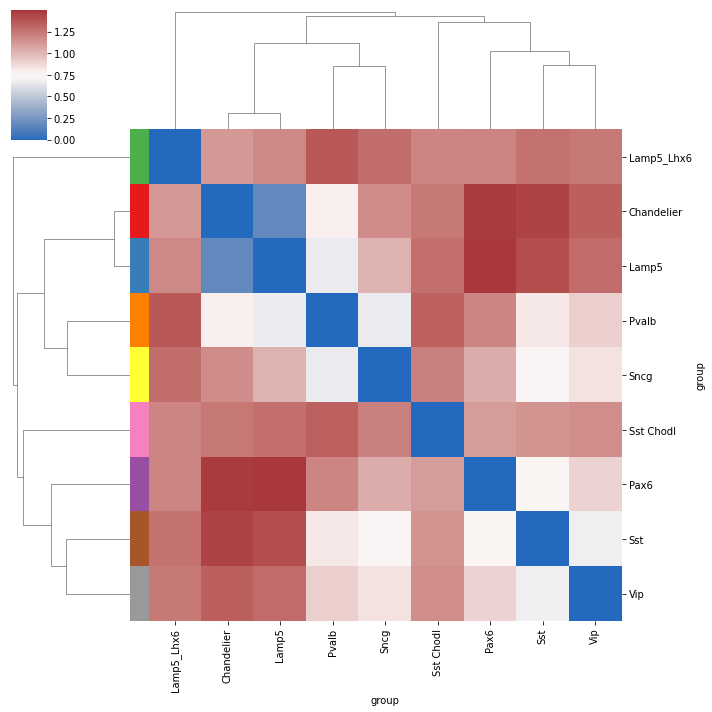

In [19]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler

df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_human/{SRP_name}/{resolution}/cre_modules.bed', sep='\t', names=['c','d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id'])


df_hba_modules = df_hba_modules.drop_duplicates(['bin_id'], keep=False)
dj = pd.concat(marker_mean_list)
dj = dj.reset_index()
#dj = dj[dj['classt']!='Non-neuronal']
dk = dj.groupby(['classt','group']).mean()

lut = dict(zip( dk.index.get_level_values('group').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('group').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('group').map(lut)



features = dk.loc[:, :]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)


In [1]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler

df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_human/{SRP_name}/{resolution}/cre_modules.bed', sep='\t', names=['c','d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id'])


df_hba_modules = df_hba_modules.drop_duplicates(['bin_id'], keep=False)
dj = pd.concat(marker_mean_list)
dj = dj.reset_index()
#dj = dj[dj['classt']!='Non-neuronal']
dk = dj.groupby(['classt','group']).mean()

lut = dict(zip( dk.index.get_level_values('group').drop_duplicates(), sns.color_palette("Set1", dk.index.get_level_values('group').shape[0]).as_hex()[:]))


row_colors =dk.index.get_level_values('group').map(lut)



features = dk.loc[:, :]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)


NameError: name 'pd' is not defined

In [124]:
lut = dict(zip( df_gene_tp_all_info_mean.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", df_gene_tp_all_info_mean.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =df_gene_tp_all_info_mean.index.get_level_values('classt').map(lut)


In [125]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [169]:
df_gene_tp_all_info_mean = df_gene_tp_all_info.groupby(['classt','group']).mean()

In [223]:
dj

0         1         2         3         4        \
classt        group                                                          
GABAergic     Chandelier -1.136939 -1.136939 -1.136939 -1.136939 -1.136939   
              Lamp5      -1.236200 -1.236200 -1.236200 -1.236200 -1.236200   
              Lamp5_Lhx6 -1.117338 -1.117338 -1.117338 -1.117338 -1.117338   
              Pax6       -1.161391 -1.161391 -1.161391 -1.161391 -1.161391   
              Pvalb      -1.159489 -1.159489 -1.159489 -1.159489 -1.159489   
              Sncg       -1.152952 -1.152952 -1.152952 -1.152952 -1.152952   
              Sst        -1.101333 -1.101333 -1.101333 -1.101333 -1.101333   
              Sst Chodl  -1.108935 -1.108935 -1.108935 -1.108935 -1.108935   
              Vip        -1.111711 -1.111711 -1.111711 -1.111711 -1.111711   
Glutamatergic L2/3 IT    -1.108780 -1.108780 -1.108780 -1.108780 -1.108780   
              L4 IT      -1.196050 -1.196050 -1.196050 -1.196050 -1.196050   
              L5 ET      -0.986197 -0.986197 -0.986197 -0.986197 -0.986197   
              L5 IT      -1.064799 -1.064799 -1.064799 -1.064799 -1.064799   
              L5/6 NP    -1.153001 -1.153001 -1.153001 -1.153001 -1.153001   
              L6 CT      -1.122397 -1.122397 -1.122397 -1.122397 -1.122397   
              L6 IT      -1.150222 -1.150222 -1.150222 -1.150222 -1.150222   
              L6 IT Car3 -1.212391 -1.212391 -1.212391 -1.212391 -1.212391   
              L6b        -1.167293 -1.167293 -1.167293 -1.167293 -1.167293   
Non-neuronal  Astro      -1.019331 -1.019331 -1.019331 -1.019331 -1.019331   
              Endo       -0.924028 -0.924028 -0.924028 -0.924028 -0.924028   
              Micro-PVM  -1.196533 -1.196533 -1.196533 -1.196533 -1.196533   
              OPC        -1.059687 -1.059687 -1.059687 -1.059687 -1.059687   
              Oligo      -1.014279 -1.014279 -1.014279 -1.014279 -1.014279   
              VLMC       -0.801605 -0.801605 -0.801605 -0.801605 -0.801605   

                           5         6         7         8         9        \
classt        group                                                          
GABAergic     Chandelier -1.136939 -1.136939 -1.136939 -1.136939 -1.136939   
              Lamp5      -1.236200 -1.236200 -1.236200 -1.236200 -1.236200   
              Lamp5_Lhx6 -1.117338 -1.117338 -1.117338 -1.117338 -1.117338   
              Pax6       -1.161391 -1.161391 -1.161391 -1.161391 -1.161391   
              Pvalb      -1.159489 -1.159489 -1.159489 -1.159489 -1.159489   
              Sncg       -1.152952 -1.152952 -1.152952 -1.152952 -1.152952   
              Sst        -1.101333 -1.101333 -1.101333 -1.101333 -1.101333   
              Sst Chodl  -1.108935 -1.108935 -1.108935 -1.108935 -1.108935   
              Vip        -1.111711 -1.111711 -1.111711 -1.111711 -1.111711   
Glutamatergic L2/3 IT    -1.108780 -1.108780 -1.108780 -1.108780 -1.108780   
              L4 IT      -1.196050 -1.196050 -1.196050 -1.196050 -1.196050   
              L5 ET      -0.986197 -0.986197 -0.986197 -0.986197 -0.986197   
              L5 IT      -1.064799 -1.064799 -1.064799 -1.064799 -1.064799   
              L5/6 NP    -1.153001 -1.153001 -1.153001 -1.153001 -1.153001   
              L6 CT      -1.122397 -1.122397 -1.122397 -1.122397 -1.122397   
              L6 IT      -1.150222 -1.150222 -1.150222 -1.150222 -1.150222   
              L6 IT Car3 -1.212391 -1.212391 -1.212391 -1.212391 -1.212391   
              L6b        -1.167293 -1.167293 -1.167293 -1.167293 -1.167293   
Non-neuronal  Astro      -1.019331 -1.019331 -1.019331 -1.019331 -1.019331   
              Endo       -0.924028 -0.924028 -0.924028 -0.924028 -0.924028   
              Micro-PVM  -1.196533 -1.196533 -1.196533 -1.196533 -1.196533   
              OPC        -1.059687 -1.059687 -1.059687 -1.059687 -1.059687   
              Oligo      -1.014279 -1.014279 -1.014279 -1.014279 -1.014279   
              VLMC       -0.801605 -0.801605 -0.

In [225]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler

dj = pd.concat(marker_mean_list)
dj = df_gene_tp_all_info.groupby(['classt','group', 'cell_type']).mean()

#features = df.loc[:, :2875001]
#features = df_gene_tp.loc[:, :]
#features = df_gene_tp.loc[:, bins_bed_cre[bins_bed_cre['cre'] >= 3]['bin_id'].tolist()]




ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [234]:
dj

0         1         2         3        \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194 -1.304194 -1.304194   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -1.109376 -1.109376 -1.109376 -1.109376   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647 -1.058647 -1.058647   
                        VLMC_2       -0.630243 -0.630243 -0.630243 -0.630243   

                                       4         5         6         7        \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194 -1.304194 -1.304194   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -1.109376 -1.109376 -1.109376 -1.109376   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647 -1.058647 -1.058647   
                        VLMC_2       -0.630243 -0.630243 -0.630243 -0.630243   

                                       8         9        ...   2875002  \
classt       group      cell_type                         ...             
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194  ... -1.289411   
                        Chandelier_2 -1.053312 -1.053312  ... -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027  ... -1.217027   
                        Lamp5_2      -1.263900 -1.263900  ... -1.263900   
                        Lamp5_3      -1.297502 -1.297502  ... -1.297502   
...                                        ...       ...  ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396  ... -0.305396   
                        Oligo_8      -1.109376 -1.109376  ... -0.560833   
                        Oligo_9      -1.065301 -1.065301  ... -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647  ... -1.100227   
                        VLMC_2       -0.630243 -0.630243  ... -0.630243   

                                       2875003   2875004   2875005   2875006  \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.289411 -1.289411 -1.289411 -1.289411   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -0.560833 -0.560833 -0.560833 -0.560833   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.100227 -1.100227 -1.100227 -1.100227   
                     

In [235]:
features = dj.loc[:, all_bins_std[all_bins_std >=0.0].index.tolist()]
features = features.dropna()
features_sc =  StandardScaler().fit_transform(features)
umap_2d = UMAP(n_components=2, init='random', random_state=20)


proj_2d = umap_2d.fit_transform(features_sc)



/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


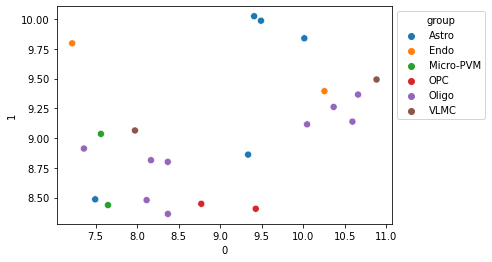

In [239]:

df_proj_2d= pd.DataFrame(proj_2d)
df_proj_2d['classt'] = dj.dropna().index.get_level_values('classt')
df_proj_2d['group'] = dj.dropna().index.get_level_values('group')
df_proj_2d = df_proj_2d[df_proj_2d['classt'] == 'Non-neuronal']
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'], s=50
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
features = dj.loc[:, all_bins_std[all_bins_std >=0.05].index.tolist()]

features_sc =  StandardScaler().fit_transform(features)
umap_2d = UMAP(n_components=2, init='random', random_state=20)


proj_2d = umap_2d.fit_transform(features_sc)

df_proj_2d= pd.DataFrame(proj_2d)

df_proj_2d['group'] = dj.index.get_level_values('classt')
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'], s=50
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [227]:
features.dropna()

0         1         2         3        \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194 -1.304194 -1.304194   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -1.109376 -1.109376 -1.109376 -1.109376   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647 -1.058647 -1.058647   
                        VLMC_2       -0.630243 -0.630243 -0.630243 -0.630243   

                                       4         5         6         7        \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194 -1.304194 -1.304194   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -1.109376 -1.109376 -1.109376 -1.109376   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647 -1.058647 -1.058647   
                        VLMC_2       -0.630243 -0.630243 -0.630243 -0.630243   

                                       8         9        ...   2875002  \
classt       group      cell_type                         ...             
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194  ... -1.289411   
                        Chandelier_2 -1.053312 -1.053312  ... -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027  ... -1.217027   
                        Lamp5_2      -1.263900 -1.263900  ... -1.263900   
                        Lamp5_3      -1.297502 -1.297502  ... -1.297502   
...                                        ...       ...  ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396  ... -0.305396   
                        Oligo_8      -1.109376 -1.109376  ... -0.560833   
                        Oligo_9      -1.065301 -1.065301  ... -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647  ... -1.100227   
                        VLMC_2       -0.630243 -0.630243  ... -0.630243   

                                       2875003   2875004   2875005   2875006  \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.289411 -1.289411 -1.289411 -1.289411   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -0.560833 -0.560833 -0.560833 -0.560833   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.100227 -1.100227 -1.100227 -1.100227   
                     

In [228]:
features

0         1         2         3        \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194 -1.304194 -1.304194   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -1.109376 -1.109376 -1.109376 -1.109376   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647 -1.058647 -1.058647   
                        VLMC_2       -0.630243 -0.630243 -0.630243 -0.630243   

                                       4         5         6         7        \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194 -1.304194 -1.304194   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -1.109376 -1.109376 -1.109376 -1.109376   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647 -1.058647 -1.058647   
                        VLMC_2       -0.630243 -0.630243 -0.630243 -0.630243   

                                       8         9        ...   2875002  \
classt       group      cell_type                         ...             
GABAergic    Chandelier Chandelier_1 -1.304194 -1.304194  ... -1.289411   
                        Chandelier_2 -1.053312 -1.053312  ... -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027  ... -1.217027   
                        Lamp5_2      -1.263900 -1.263900  ... -1.263900   
                        Lamp5_3      -1.297502 -1.297502  ... -1.297502   
...                                        ...       ...  ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396  ... -0.305396   
                        Oligo_8      -1.109376 -1.109376  ... -0.560833   
                        Oligo_9      -1.065301 -1.065301  ... -1.065301   
             VLMC       VLMC_1       -1.058647 -1.058647  ... -1.100227   
                        VLMC_2       -0.630243 -0.630243  ... -0.630243   

                                       2875003   2875004   2875005   2875006  \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.289411 -1.289411 -1.289411 -1.289411   
                        Chandelier_2 -1.053312 -1.053312 -1.053312 -1.053312   
             Lamp5      Lamp5_1      -1.217027 -1.217027 -1.217027 -1.217027   
                        Lamp5_2      -1.263900 -1.263900 -1.263900 -1.263900   
                        Lamp5_3      -1.297502 -1.297502 -1.297502 -1.297502   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.305396 -0.305396 -0.305396 -0.305396   
                        Oligo_8      -0.560833 -0.560833 -0.560833 -0.560833   
                        Oligo_9      -1.065301 -1.065301 -1.065301 -1.065301   
             VLMC       VLMC_1       -1.100227 -1.100227 -1.100227 -1.100227   
                     

In [217]:
dj = pd.concat(marker_mean_list)
#dj = df_gene_tp_all_info_mean

#dj = df_gene_tp_all_info_mean
dj = dj.reset_index()

#dj = dj[dj['classt']!='Non-neuronal']
#dj = dj[dj['classt']=='GABAergic']
#dj = dj[dj['classt']=='Glutamatergic']


from sklearn.decomposition import PCA
features = dj.loc[:, all_bins_std[all_bins_std >= 0].index.tolist()]
features  = features.dropna(axis=1)
features_sc =  StandardScaler().fit_transform(features)
#pca = PCA(n_components=2)
#proj_2da = pca.fit_transform(features_sc)
umap_2d = UMAP(n_components=2, init='random', random_state=10)
proj_2da = umap_2d.fit_transform(features_sc)
df_proj_2da= pd.DataFrame(proj_2da)
df_proj_2da['classt'] = dj['classt'].tolist()
df_proj_2da['group'] = dj['group'].tolist()


In [195]:
df_proj_2da= pd.DataFrame(proj_2da)
df_proj_2da['classt'] = dj['classt'].tolist()
df_proj_2da['group'] = dj['group'].tolist()

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


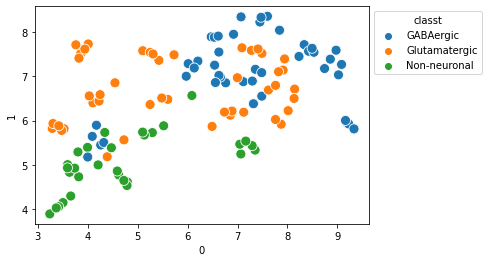

In [218]:

ax= sns.scatterplot(
    df_proj_2da[0], df_proj_2da[1],
    hue=df_proj_2da['classt'],s=100
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


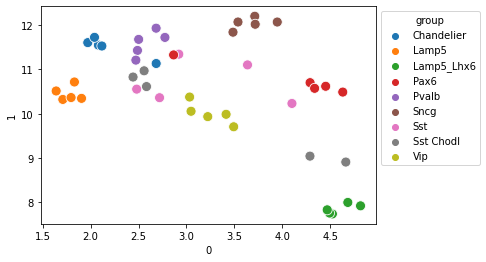

In [213]:
df_proj_2dat = df_proj_2da[df_proj_2da['classt']=='GABAergic']
ax= sns.scatterplot(
    df_proj_2dat[0], df_proj_2dat[1],
    hue=df_proj_2dat['group'],s=100
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


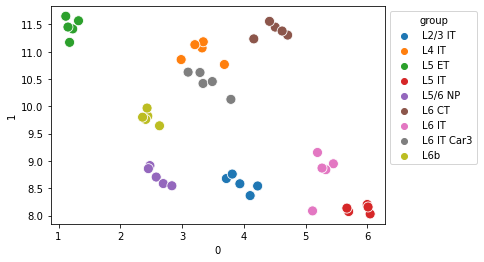

In [214]:
df_proj_2dat = df_proj_2da[df_proj_2da['classt']=='Glutamatergic']
ax= sns.scatterplot(
    df_proj_2dat[0], df_proj_2dat[1],
    hue=df_proj_2dat['group'],s=100
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


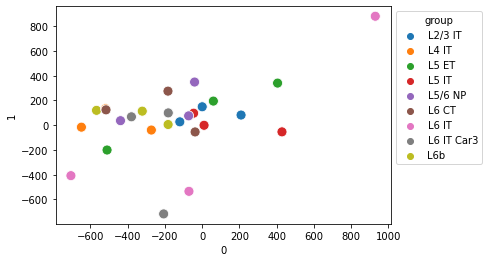

In [189]:
df_proj_2da= pd.DataFrame(proj_2da)
df_proj_2da['classt'] = dj['classt'].tolist()
df_proj_2da['group'] = dj['group'].tolist()
df_proj_2da = df_proj_2da[df_proj_2da['classt']=='Glutamatergic']
ax= sns.scatterplot(
    df_proj_2da[0], df_proj_2da[1],
    hue=df_proj_2da['group'],s=100
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [176]:


df_proj_2d['group'] = df_gene_tp_all_info_mean.index.get_level_values('classt')


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


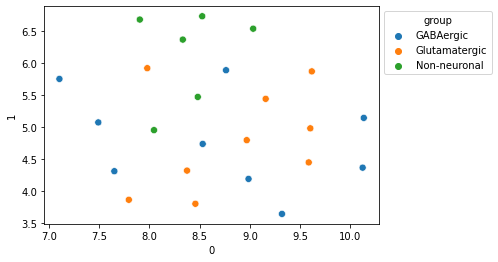

In [177]:
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'], s=50
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


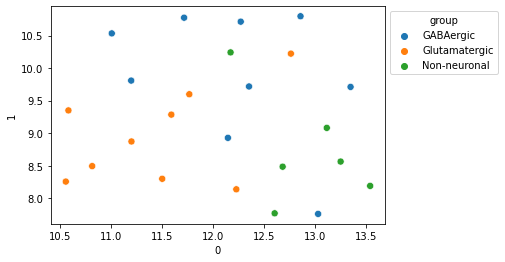

In [172]:
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'], s=50
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [157]:
df_gene_tp_all_info_mean

0         1         2         3        \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.180019 -1.180019 -1.180019 -1.180019   
                        Chandelier_2 -0.943137 -0.943137 -0.943137 -0.943137   
             Lamp5      Lamp5_1      -1.083808 -1.083808 -1.083808 -1.083808   
                        Lamp5_2      -1.021739 -1.021739 -1.021739 -1.021739   
                        Lamp5_3      -1.036233 -1.036233 -1.036233 -1.036233   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.499861 -0.499861 -0.499861 -0.499861   
                        Oligo_8      -0.935771 -0.935771 -0.935771 -0.935771   
                        Oligo_9      -1.019388 -1.019388 -1.019388 -1.019388   
             VLMC       VLMC_1       -1.050502 -1.050502 -1.050502 -1.050502   
                        VLMC_2       -0.881856 -0.881856 -0.881856 -0.881856   

                                       4         5         6         7        \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.180019 -1.180019 -1.180019 -1.180019   
                        Chandelier_2 -0.943137 -0.943137 -0.943137 -0.943137   
             Lamp5      Lamp5_1      -1.083808 -1.083808 -1.083808 -1.083808   
                        Lamp5_2      -1.021739 -1.021739 -1.021739 -1.021739   
                        Lamp5_3      -1.036233 -1.036233 -1.036233 -1.036233   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.499861 -0.499861 -0.499861 -0.499861   
                        Oligo_8      -0.935771 -0.935771 -0.935771 -0.935771   
                        Oligo_9      -1.019388 -1.019388 -1.019388 -1.019388   
             VLMC       VLMC_1       -1.050502 -1.050502 -1.050502 -1.050502   
                        VLMC_2       -0.881856 -0.881856 -0.881856 -0.881856   

                                       8         9        ...   2875002  \
classt       group      cell_type                         ...             
GABAergic    Chandelier Chandelier_1 -1.180019 -1.180019  ... -1.194689   
                        Chandelier_2 -0.943137 -0.943137  ... -0.964292   
             Lamp5      Lamp5_1      -1.083808 -1.083808  ... -1.092302   
                        Lamp5_2      -1.021739 -1.021739  ... -1.044661   
                        Lamp5_3      -1.036233 -1.036233  ... -1.052276   
...                                        ...       ...  ...       ...   
Non-neuronal Oligo      Oligo_7      -0.499861 -0.499861  ... -0.484658   
                        Oligo_8      -0.935771 -0.935771  ... -0.911353   
                        Oligo_9      -1.019388 -1.019388  ... -1.027203   
             VLMC       VLMC_1       -1.050502 -1.050502  ... -1.024408   
                        VLMC_2       -0.881856 -0.881856  ... -0.883334   

                                       2875003   2875004   2875005   2875006  \
classt       group      cell_type                                              
GABAergic    Chandelier Chandelier_1 -1.194689 -1.194689 -1.194689 -1.194689   
                        Chandelier_2 -0.964292 -0.964292 -0.964292 -0.964292   
             Lamp5      Lamp5_1      -1.092302 -1.092302 -1.092302 -1.092302   
                        Lamp5_2      -1.044661 -1.044661 -1.044661 -1.044661   
                        Lamp5_3      -1.052276 -1.052276 -1.052276 -1.052276   
...                                        ...       ...       ...       ...   
Non-neuronal Oligo      Oligo_7      -0.484658 -0.484658 -0.484658 -0.484658   
                        Oligo_8      -0.911353 -0.911353 -0.911353 -0.911353   
                        Oligo_9      -1.027203 -1.027203 -1.027203 -1.027203   
             VLMC       VLMC_1       -1.024408 -1.024408 -1.024408 -1.024408   
                     

In [161]:
#df_gene_tp_all_info_mean[df_proj_2d['classt']=='Glutamatergic']
dj = df_gene_tp_all_info_mean.reset_index()
dj = dj[dj['classt']=='Glutamatergic']
features = dj.loc[:, all_bins_std[all_bins_std >=0.05].index.tolist()]

features_sc =  StandardScaler().fit_transform(features)

umap_2d = UMAP(n_components=2, init='random', random_state=20)


proj_2d = umap_2d.fit_transform(features_sc)

df_proj_2d= pd.DataFrame(proj_2d)
df_proj_2d['group'] = dj['group'].tolist()
#df_proj_2d['classt'] = df_gene_tp_all_info_mean.index.get_level_values('classt')

In [152]:
df_proj_2da = df_proj_2d[df_proj_2d['classt']=='GABAergic']

In [155]:
df_proj_2da = df_proj_2d[df_proj_2d['classt']=='Glutamatergic']

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


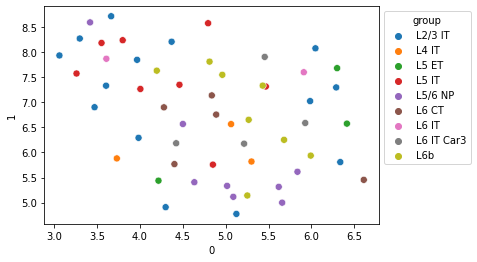

In [163]:
ax=sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['group'], s=50
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


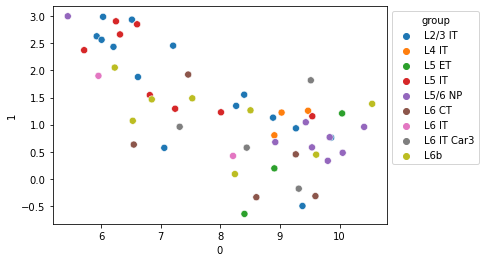

In [156]:
ax=sns.scatterplot(
    df_proj_2da[0],df_proj_2da[1],
    hue=df_proj_2da['group'], s=50
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [91]:
umap_2d = UMAP(n_components=2, init='random', random_state=20)


proj_2d = umap_2d.fit_transform(features_sc)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

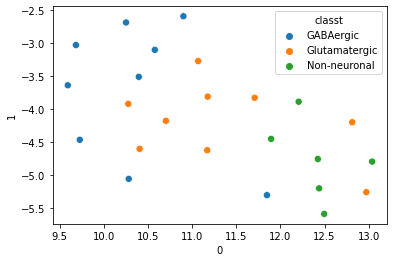

In [92]:
df_proj_2d= pd.DataFrame(proj_2d)

df_proj_2d['classt'] = df_gene_tp_all_info_mean.index.get_level_values('classt')
sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'], s=50
)

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj_2d = pca.fit_transform(features_sc)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

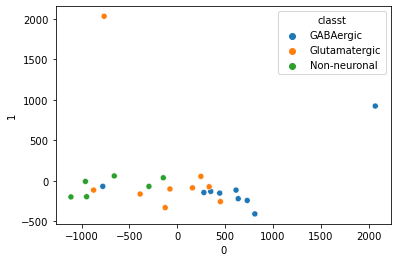

In [128]:
df_proj_2d= pd.DataFrame(proj_2d)

df_proj_2d['classt'] = df_gene_tp_all_info_mean.index.get_level_values('classt')
sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

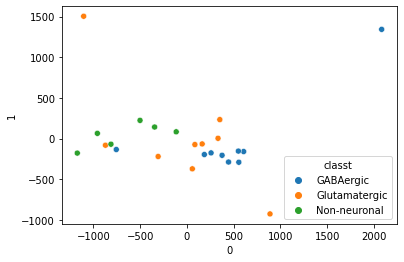

In [110]:
df_proj_2d= pd.DataFrame(proj_2d)

df_proj_2d['classt'] = df_gene_tp_all_info_mean.index.get_level_values('classt')
sns.scatterplot(
    df_proj_2d[0],df_proj_2d[1],
    hue=df_proj_2d['classt'],
)

<ipython-input-93-fade4fa8ee78>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df_dist[[np.arange(df_dist.shape[0])]*2] = 0


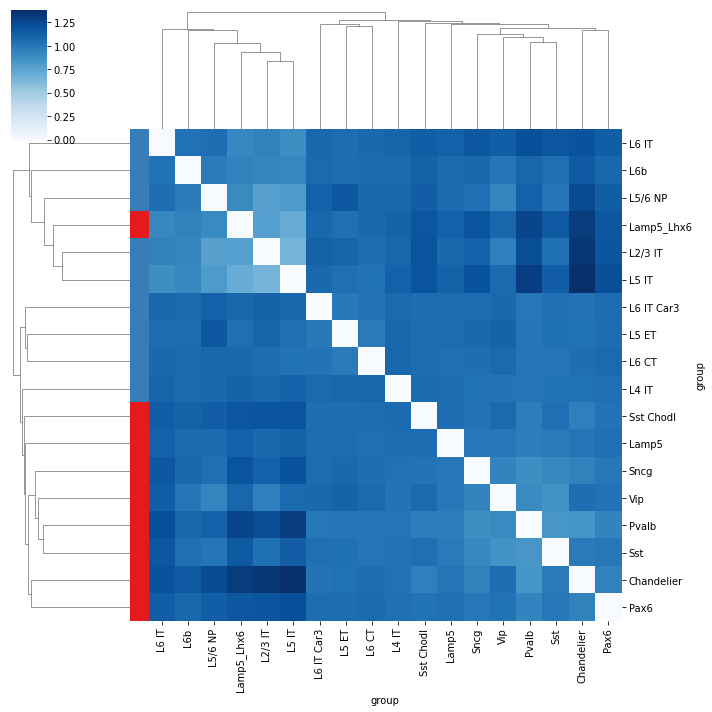

In [93]:


features = df_gene_tp_all_info_mean.loc[:, all_bins_std[all_bins_std >=0].index.tolist()]
#features = pd.concat([features[0:8] , features[19:25]])
features = pd.concat([features[0:18]])
features_sc =  StandardScaler().fit_transform(features)

lut = dict(zip( features.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", df_gene_tp_all_info_mean.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =features.index.get_level_values('classt').map(lut)

R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="Blues", row_colors=row_colors)


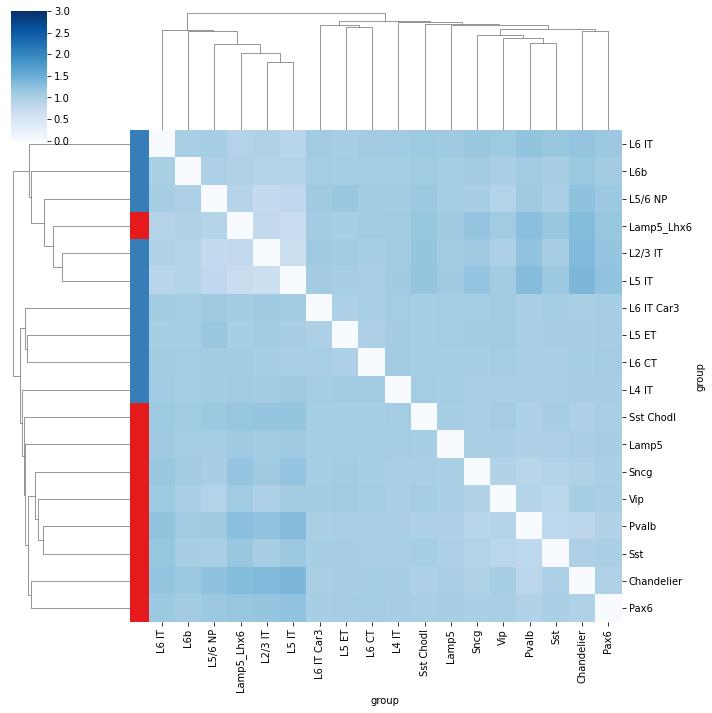

In [96]:
sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="Blues", row_colors=row_colors, vmax=3)

<ipython-input-111-1b3efc6a3540>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df_dist[[np.arange(df_dist.shape[0])]*2] = 0


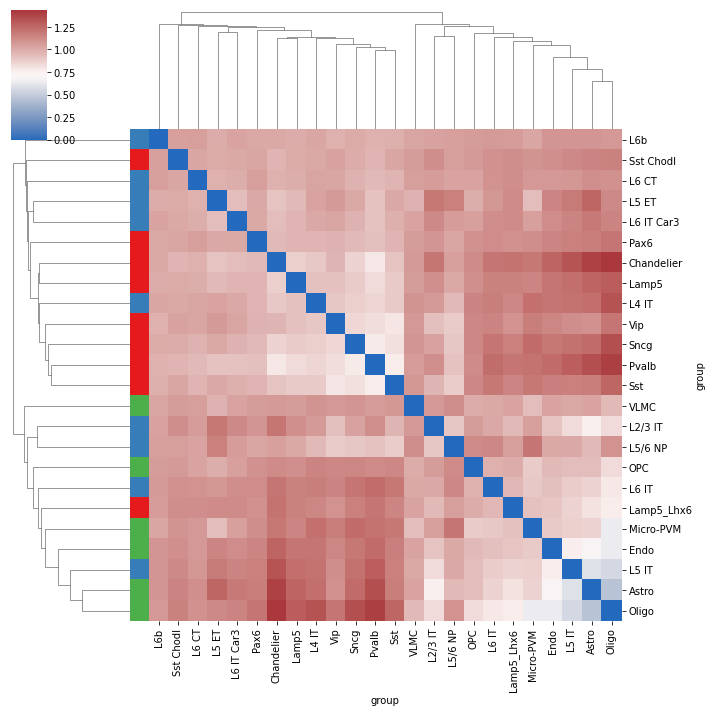

In [111]:
features = df_gene_tp_all_info_mean.loc[:, all_bins_std[all_bins_std >=0].index.tolist()]
#features = pd.concat([features[0:8] , features[19:25]])

features_sc =  StandardScaler().fit_transform(features)

lut = dict(zip( features.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", df_gene_tp_all_info_mean.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =features.index.get_level_values('classt').map(lut)

R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)


<ipython-input-129-1b3efc6a3540>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df_dist[[np.arange(df_dist.shape[0])]*2] = 0


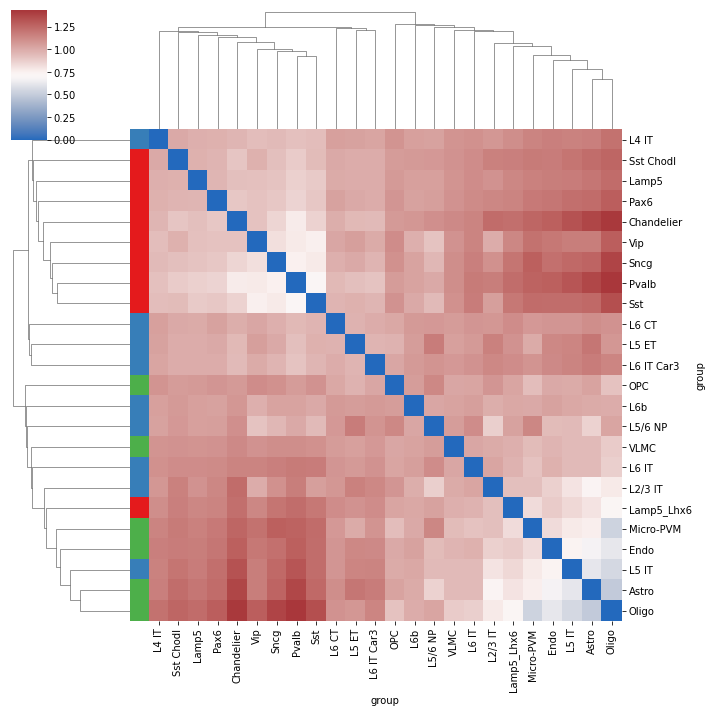

In [129]:
features = df_gene_tp_all_info_mean.loc[:, all_bins_std[all_bins_std >=0].index.tolist()]
#features = pd.concat([features[0:8] , features[19:25]])

features_sc =  StandardScaler().fit_transform(features)

lut = dict(zip( features.index.get_level_values('classt').drop_duplicates(), sns.color_palette("Set1", df_gene_tp_all_info_mean.index.get_level_values('classt').shape[0]).as_hex()[:]))


row_colors =features.index.get_level_values('classt').map(lut)

R1 = np.round(np.corrcoef(features_sc), 10)
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
df_dist = 1-R1
df_dist[[np.arange(df_dist.shape[0])]*2] = 0
linkage = hc.linkage(sp.distance.squareform(df_dist), method='average')
df_dist_df = pd.DataFrame(df_dist,  index=features.index.get_level_values('group'), columns = features.index.get_level_values('group'))

sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)


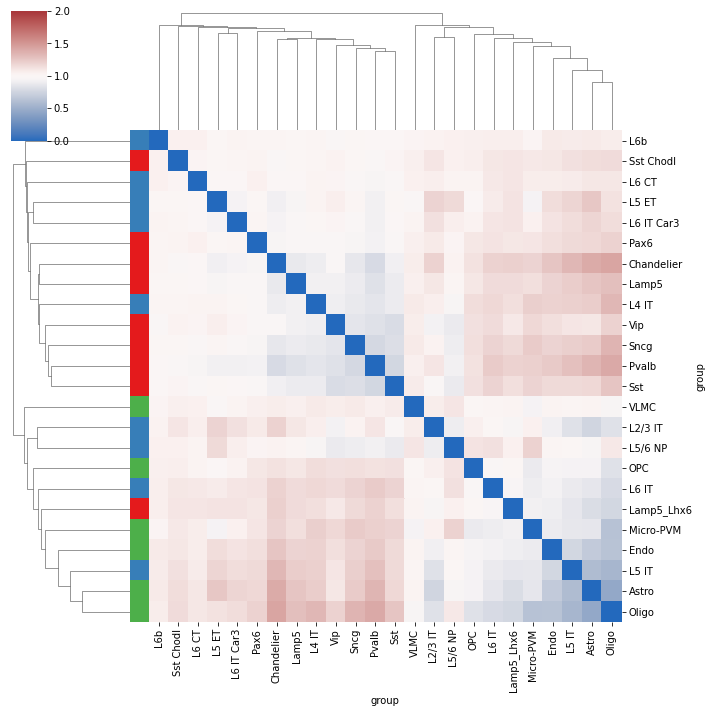

In [116]:
sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors, vmax=2)


In [112]:
a

NameError: name 'a' is not defined

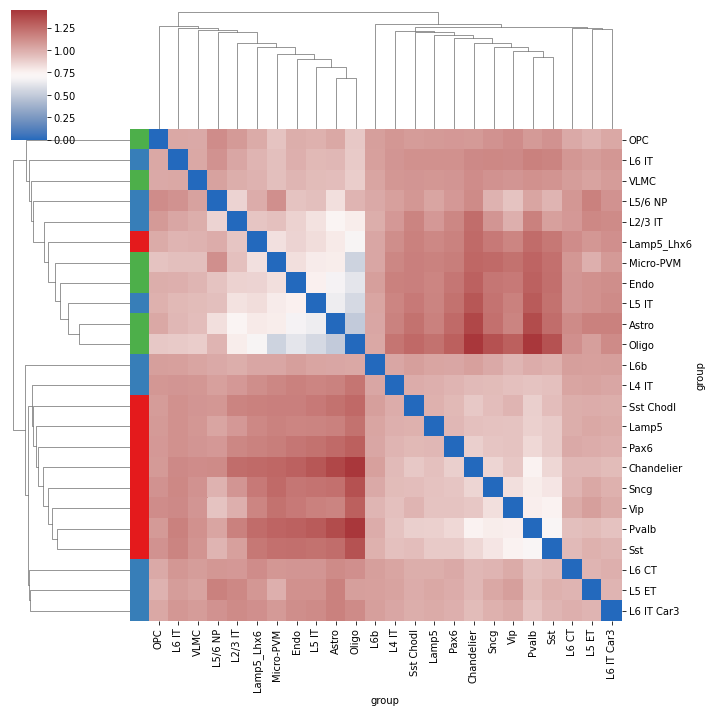

In [98]:
sns.clustermap(df_dist_df, row_linkage=linkage, col_linkage=linkage, cmap="vlag", row_colors=row_colors)

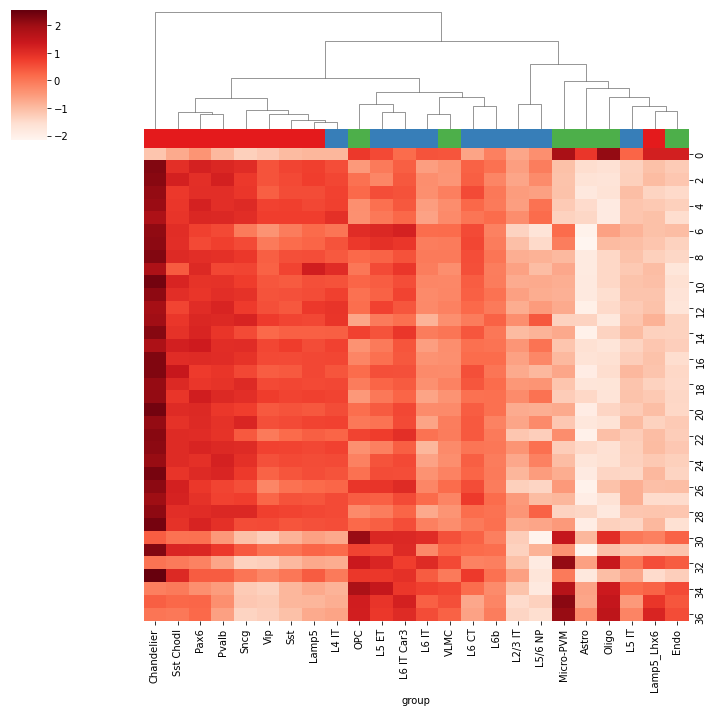

In [72]:

df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_human/{SRP_name}/{resolution}/cre_modules.bed', sep='\t', names=['c','d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id'])


df_hba_modules = df_hba_modules.drop_duplicates(['bin_id'], keep=False)
all_bins = []
mean_list = []
all_bins = []
for i in list(range(1,38)):
    m="M"+str(i)
    given_bins = df_hba_modules[df_hba_modules['ccre']==m]['bin_id'].tolist()
    all_bins.extend(given_bins)
    all_bins.extend(given_bins)
    mean_list.append(df_gene_tp_all_info_mean.loc[: , given_bins].mean(axis=1).values.tolist())
features_sc =  StandardScaler().fit_transform((np.vstack(mean_list)).T)
mean_list_df = pd.DataFrame(features_sc.T , columns = df_gene_tp_all_info_mean.index.get_level_values('group'))

sns.clustermap(mean_list_df, col_cluster=True, row_cluster=False, robust=False, z_score=0, col_colors=[row_colors], cmap='Reds')


(18, 18)
(18, 3)
0.6666666666666667
0.006172839506172867


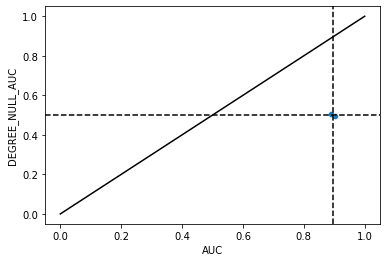

In [74]:
features = df_gene_tp_all_info_mean.loc[:, all_bins_std[all_bins_std >=0].index.tolist()]
features =features[0:18]
features_sc =  StandardScaler().fit_transform(features)
R1 = np.round(np.corrcoef(features_sc), 10)
R1 = R1 + abs(R1.min())
df_dist_df = pd.DataFrame(R1 ,  index=features .index.get_level_values('group'), columns = features .index.get_level_values('group'))


df_go = df_gene_tp_all_info_mean[[0]].reset_index()

df_go['val'] = 1

df_go_table = df_go.pivot_table(index='group', columns='classt', values='val', aggfunc='sum')
df_go_table.fillna(0, inplace=True)


df_2d_jac, go_chrom  = run_egad(df_go_table, df_dist_df )
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_2d_jac, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [70]:
df_2d_jac

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC   P_Value
classt                                                             
GABAergic      0.888889        42.871384         0.444444  0.000165
Glutamatergic  0.392593        42.942661         0.525926  0.160653
Non-neuronal   0.962963        43.007426         0.537037  0.000138

In [68]:
df_2d_jac

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC   P_Value
classt                                                             
GABAergic      0.925926        10.209226         0.385185  0.000042
Glutamatergic  0.392593        10.351934         0.466667  0.115658
Non-neuronal   0.916667        10.467739         0.685185  0.000532